In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

pd.set_option('display.max_colwidth', 100)

In [12]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (4, 4)
# Set the style of the plot for publication
#sns.set(style="white", context="talk")  # 'talk' context increases font sizes


In [13]:
# List of all cell types
cell_types = ["Podo", "TAL", "DTL_ATL", "DCT", "DCT2", "CNT", "CD_PC", "MD", "PTS1", "PTS2", "PTS3", "injPT", "injTAL", "injDCT_CNT", "EC", "Stromal", "ICA", "ICB",  "Immune", "PEC"]  # Replace with actual cell types


In [14]:
# Define the paths
metadata_path = ".../Atlas/scSPECTRA/multispecies/multispecies_metadata_complete.csv"  
r2_base_path = ".../Atlas/scSPECTRA/onthefly/rodents_on_human_disease/V4/R2/R2_"


In [15]:
# Load the metadata
metadata = pd.read_csv(metadata_path)

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

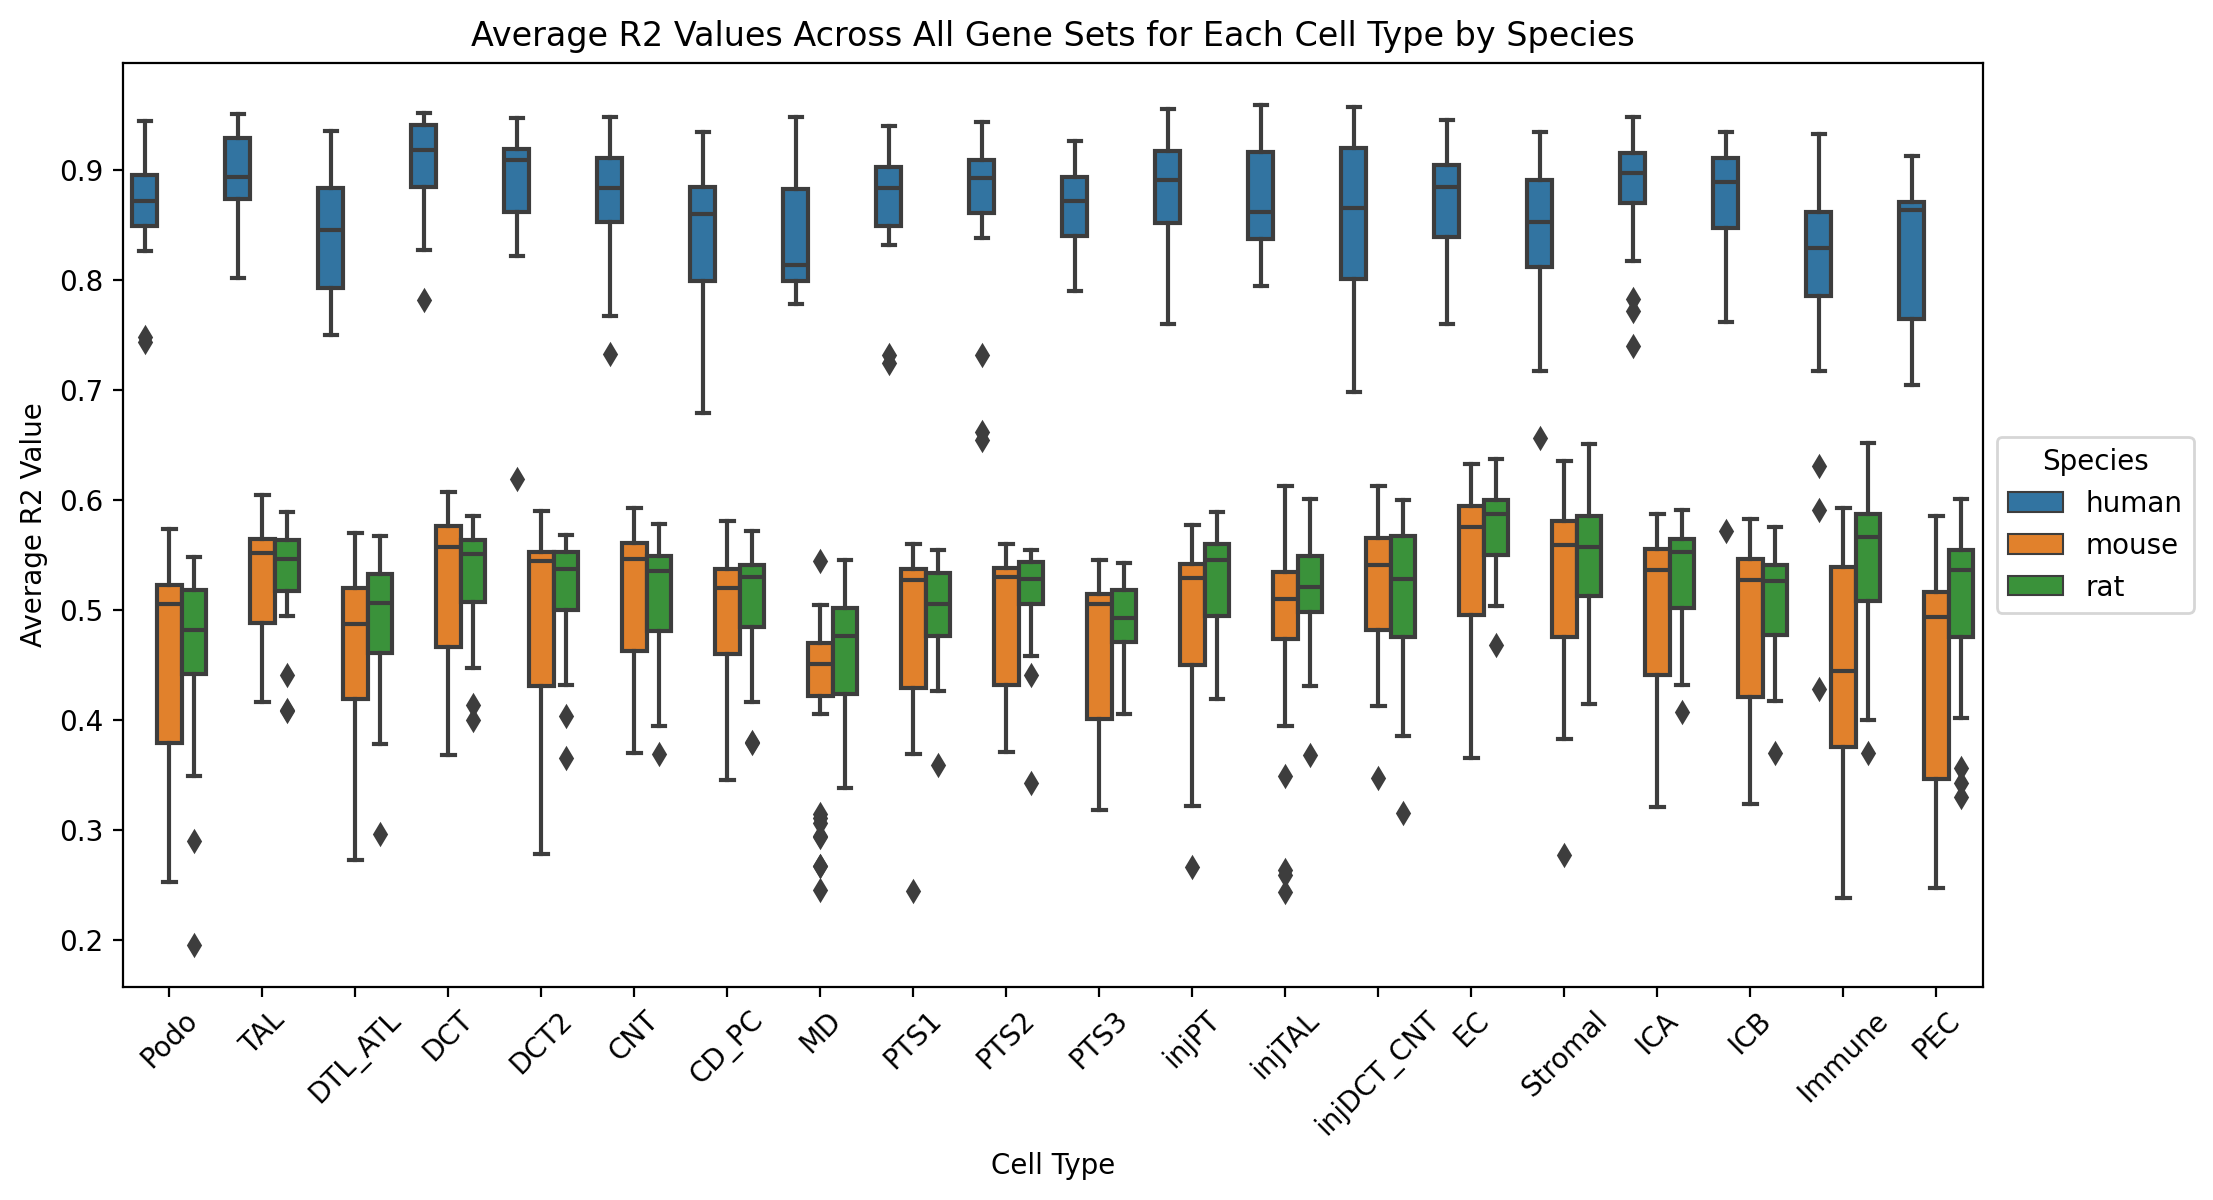

In [16]:
# List of all cell types
cell_types = ["Podo", "TAL", "DTL_ATL", "DCT", "DCT2", "CNT", "CD_PC", "MD", "PTS1", "PTS2", "PTS3", "injPT", "injTAL", "injDCT_CNT", "EC", "Stromal", "ICA", "ICB",  "Immune", "PEC"]  # Replace with actual cell types

samples_in_reference = metadata[(metadata["species"] == "human") & (metadata["disease"] == "diseased")]["orig_ident"].unique().tolist()

# Initialize an empty DataFrame for combined data
combined_data = pd.DataFrame()

# Loop through each cell type
for cell_type in cell_types:
    # Read the R2 file for the current cell type
    r2_file_path = f"{r2_base_path}{cell_type}.csv"
    r2_data = pd.read_csv(r2_file_path, index_col=0)
    r2_data = r2_data[~r2_data.index.isin(samples_in_reference)]


    # Reshape the R2 data
    r2_data_melted = r2_data.reset_index().melt(id_vars='index', var_name='gene_set', value_name='r2_value')

    # Calculate the mean R2 value for each sample
    mean_r2_values = r2_data_melted.groupby('index')['r2_value'].mean().reset_index()
    mean_r2_values.rename(columns={'index': 'orig_ident', 'r2_value': 'mean_r2_value'}, inplace=True)

    # Merge with metadata to include species and cell type
    temp_data = pd.merge(mean_r2_values, metadata, on='orig_ident')
    temp_data['cell_type'] = cell_type  # Add a column for the cell type

    # Append to the combined DataFrame
    combined_data = pd.concat([combined_data, temp_data])

# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]    
    
# Create a boxplot for each cell type and species
plt.figure(figsize=(12, 6))
sns.boxplot(x='cell_type', y='mean_r2_value', hue='species', data=combined_data, palette = custom_palette)
plt.title("Average R2 Values Across All Gene Sets for Each Cell Type by Species")
plt.xlabel("Cell Type")
plt.ylabel("Average R2 Value")
plt.xticks(rotation=45)
plt.legend(title='Species', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


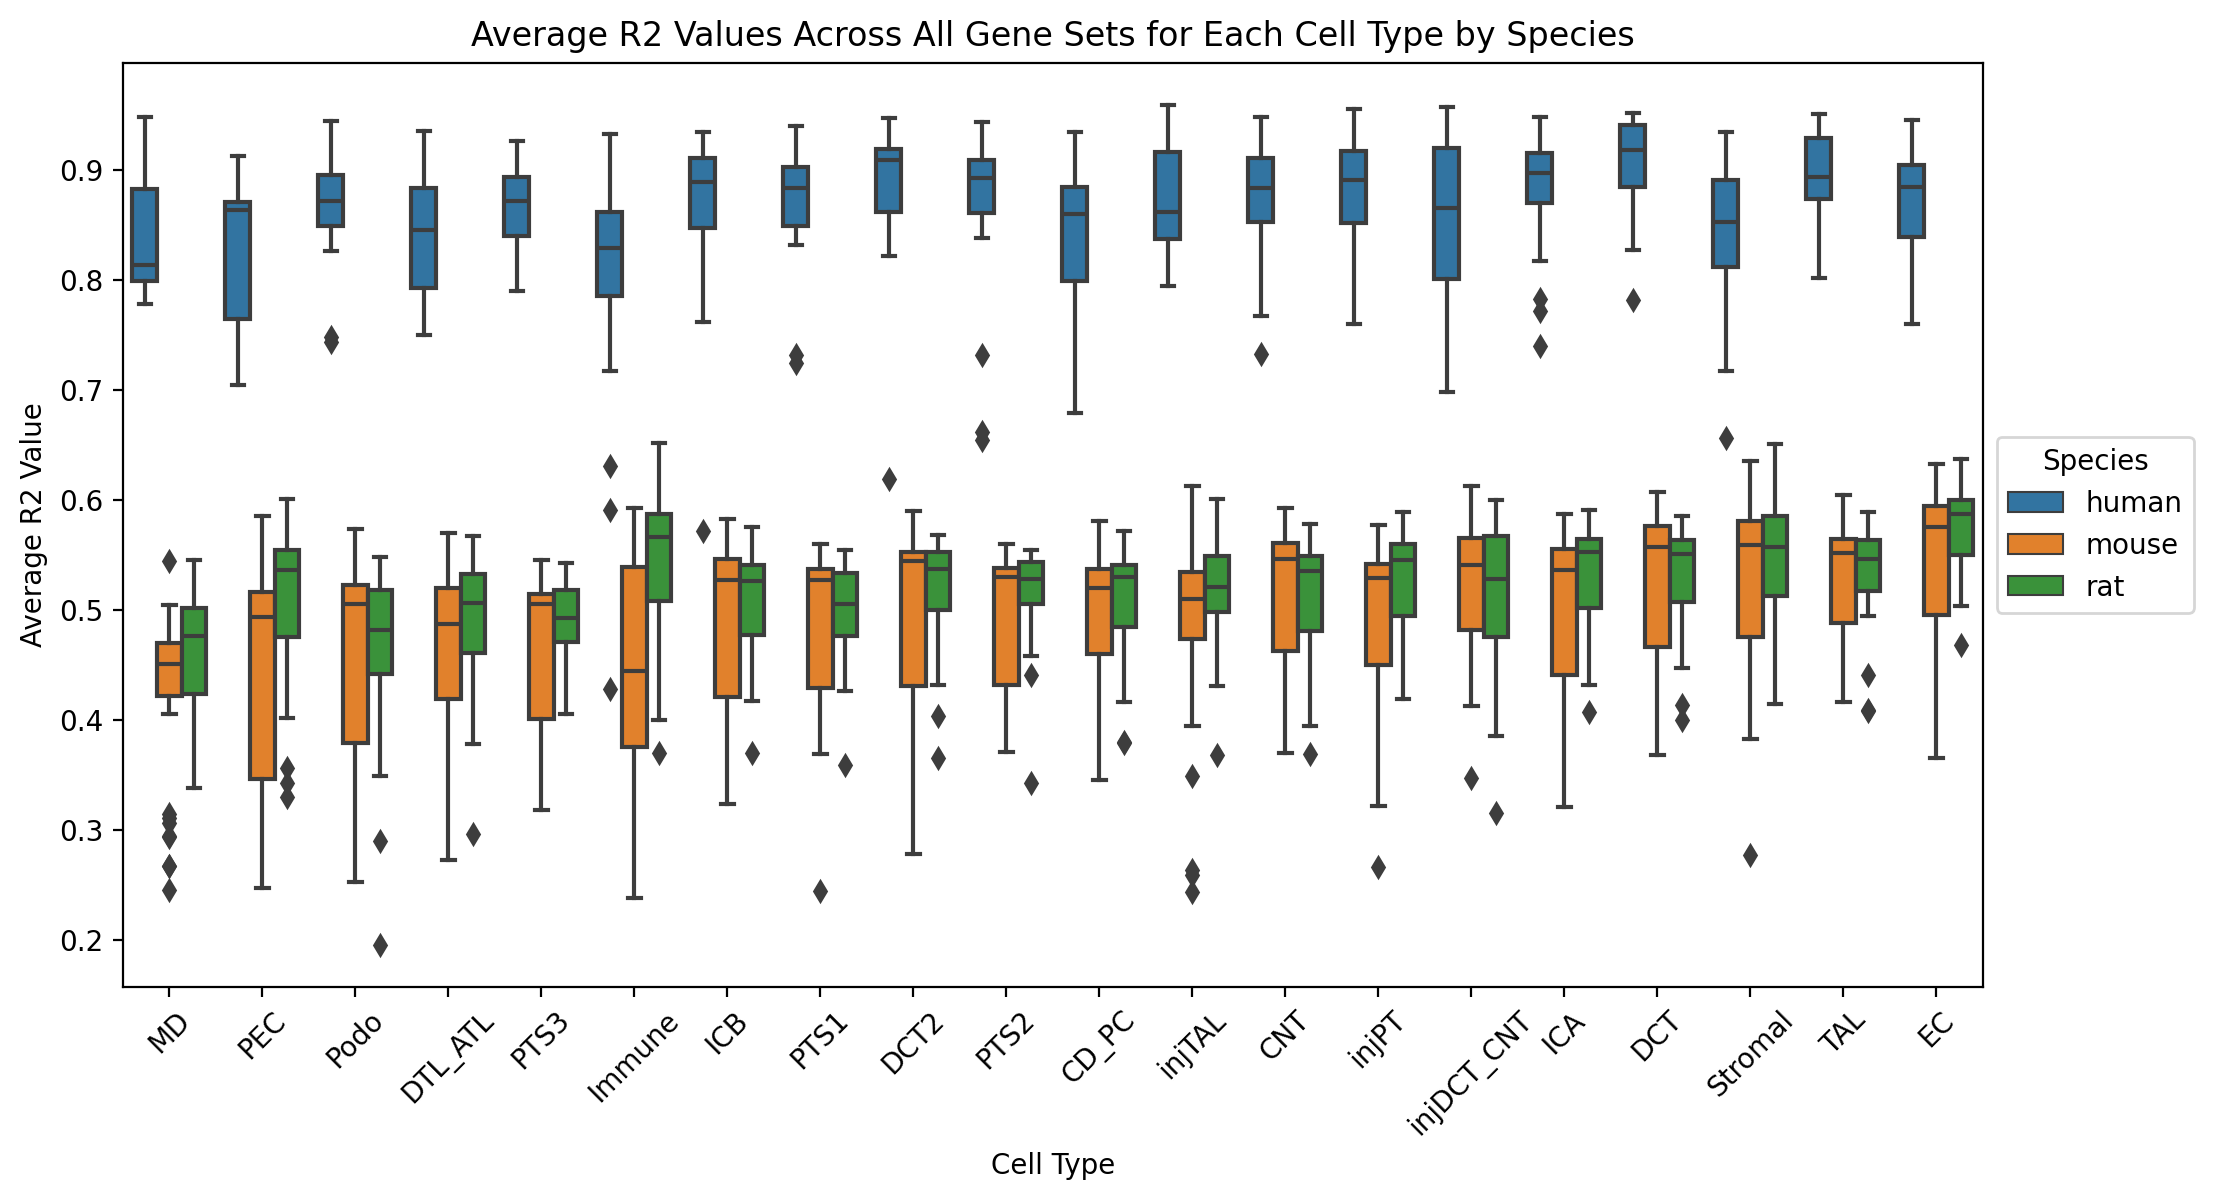

In [18]:
# Calculate the overall average R2 value for each cell type
overall_avg_r2 = combined_data.groupby('cell_type')['mean_r2_value'].mean().sort_values()

# Get the sorted order of cell types
sorted_cell_types = overall_avg_r2.index.tolist()

# Create a boxplot with the sorted order of cell types
plt.figure(figsize=(12, 6))
sns.boxplot(x='cell_type', y='mean_r2_value', hue='species', data=combined_data, palette=custom_palette, order=sorted_cell_types)
plt.title("Average R2 Values Across All Gene Sets for Each Cell Type by Species")
plt.xlabel("Cell Type")
plt.ylabel("Average R2 Value")
plt.xticks(rotation=45)
#plt.ylim(0, 1)
plt.legend(title='Species', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

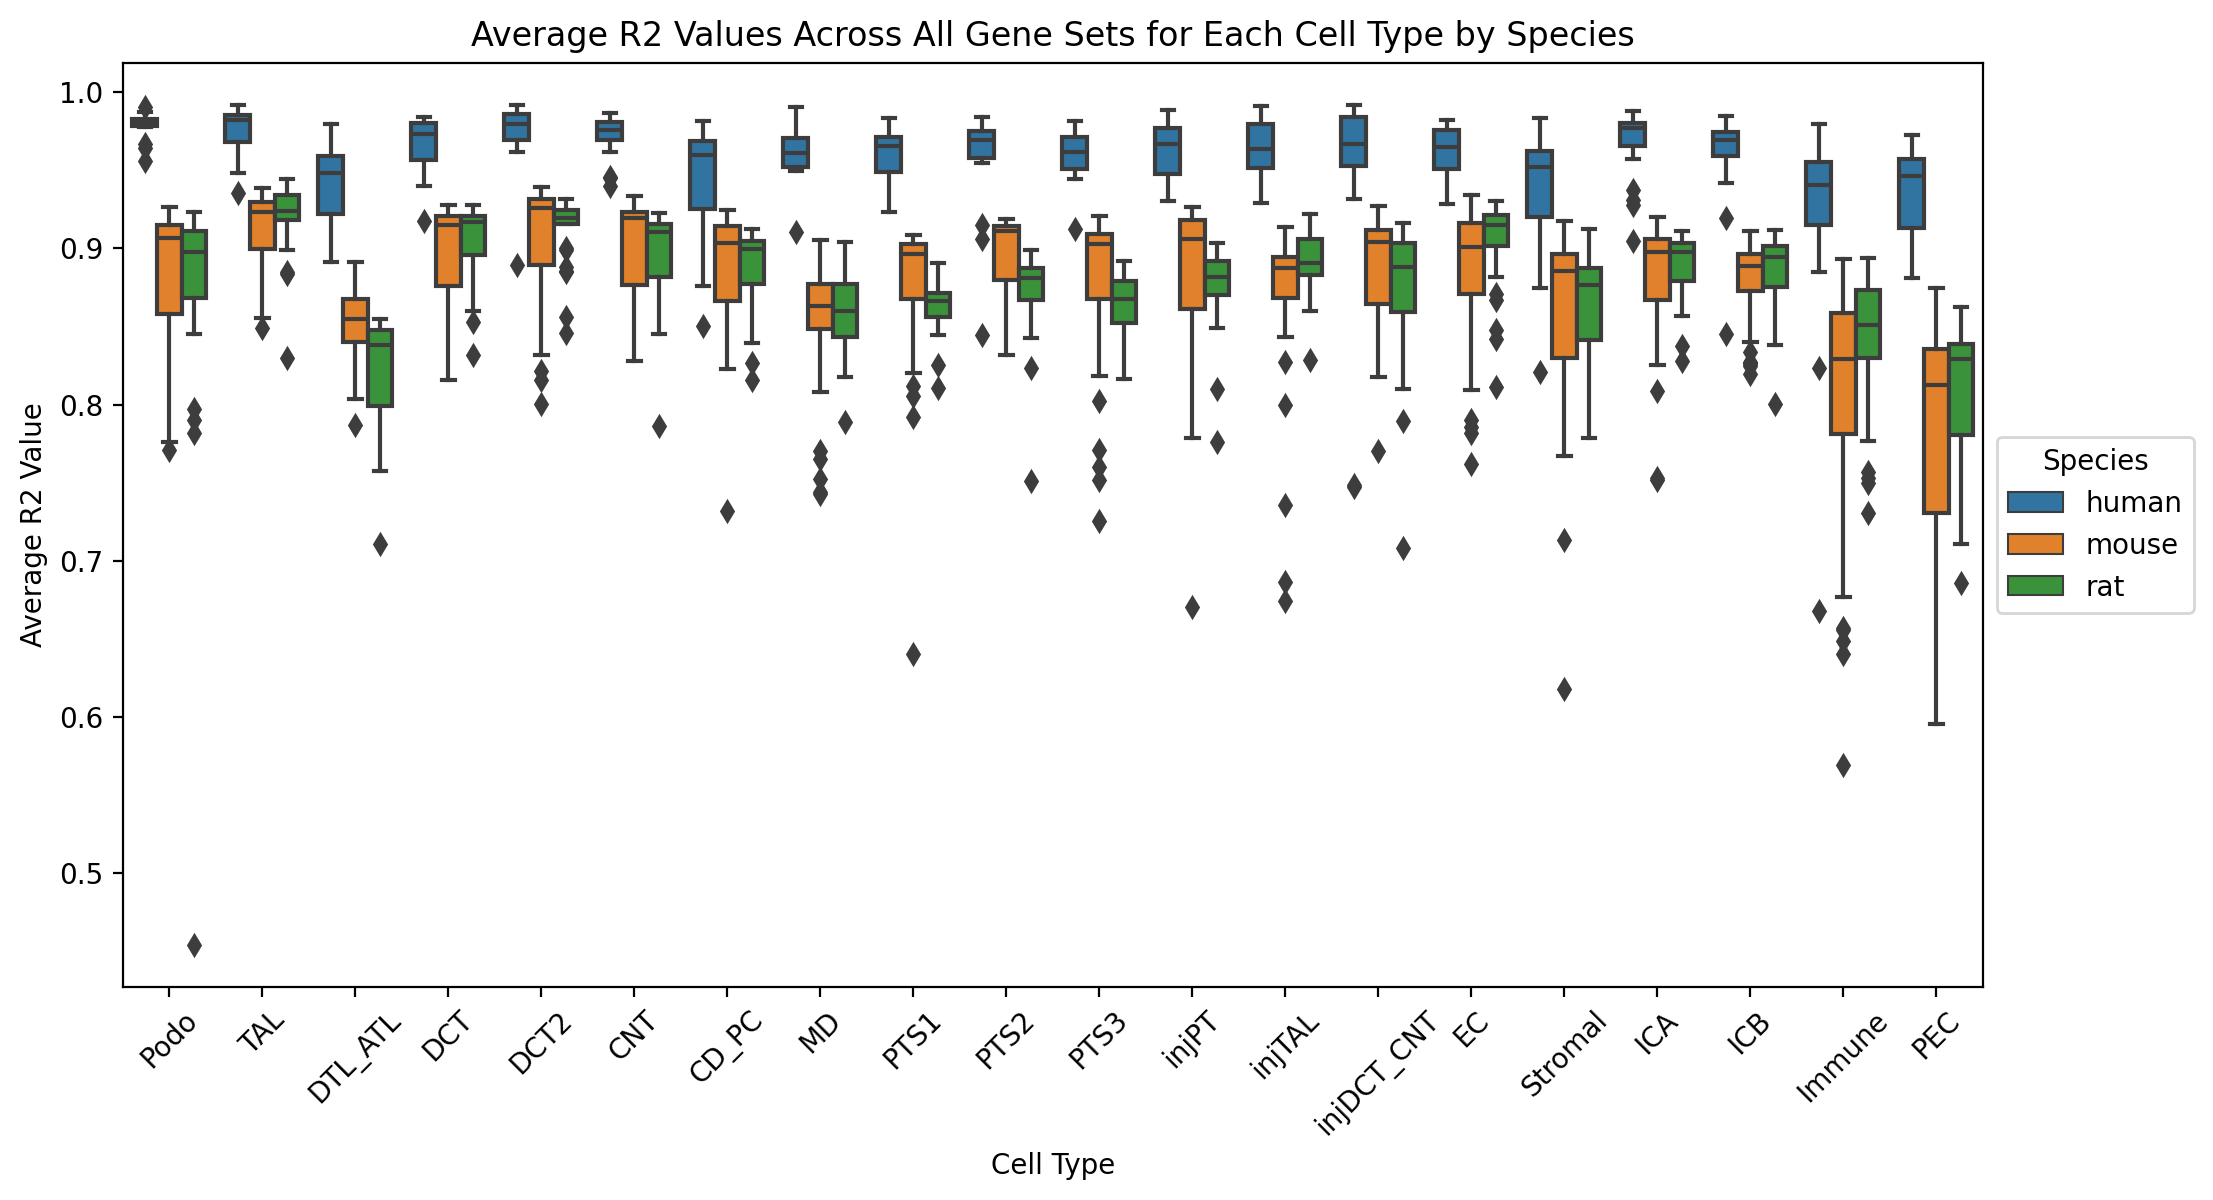

In [579]:
#working?

combined_data = pd.DataFrame()

for cell_type in cell_types:
    # Read the R2 file for the current cell type
    r2_file_path = f"{r2_base_path}{cell_type}.csv"
    r2_data = pd.read_csv(r2_file_path, index_col=0)
    r2_data = r2_data[~r2_data.index.isin(samples_in_reference)]

    # Read the marker gene sets file for the current cell type
    marker_file_path = f".../Atlas/scSPECTRA/multispecies_marker_new/statistic/{cell_type}_marker_features.csv"
    marker_data = pd.read_csv(marker_file_path)
    marker_data = marker_data[(marker_data['LogFoldChange'] > 0) & (marker_data['FDR'] < 0.05)]
    #print(len(marker_data))
    # Select the top 100 marker gene sets based on FDR
    top_markers = marker_data.nlargest(50, 'MeanInGroup')['GeneSet']
    #top_markers = marker_data['GeneSet']

    # Filter the R2 data to include only the top 100 marker gene sets
    r2_data_filtered = r2_data[top_markers]

    # Continue with your existing process
    # Reshape the R2 data
    r2_data_melted = r2_data_filtered.reset_index().melt(id_vars='index', var_name='gene_set', value_name='r2_value')

    # Calculate the mean R2 value for each sample
    mean_r2_values = r2_data_melted.groupby('index')['r2_value'].mean().reset_index()
    mean_r2_values.rename(columns={'index': 'orig_ident', 'r2_value': 'mean_r2_value'}, inplace=True)

    # Merge with metadata to include species and cell type
    temp_data = pd.merge(mean_r2_values, metadata, on='orig_ident')
    temp_data['cell_type'] = cell_type

    # Append to the combined DataFrame
    combined_data = pd.concat([combined_data, temp_data])

# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']       
    
# Create a boxplot for each cell type and species
plt.figure(figsize=(12, 6))
sns.boxplot(x='cell_type', y='mean_r2_value', hue='species', data=combined_data, palette = custom_palette)
plt.title("Average R2 Values Across All Gene Sets for Each Cell Type by Species")
plt.xlabel("Cell Type")
plt.ylabel("Average R2 Value")
plt.xticks(rotation=45)
plt.legend(title='Species', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


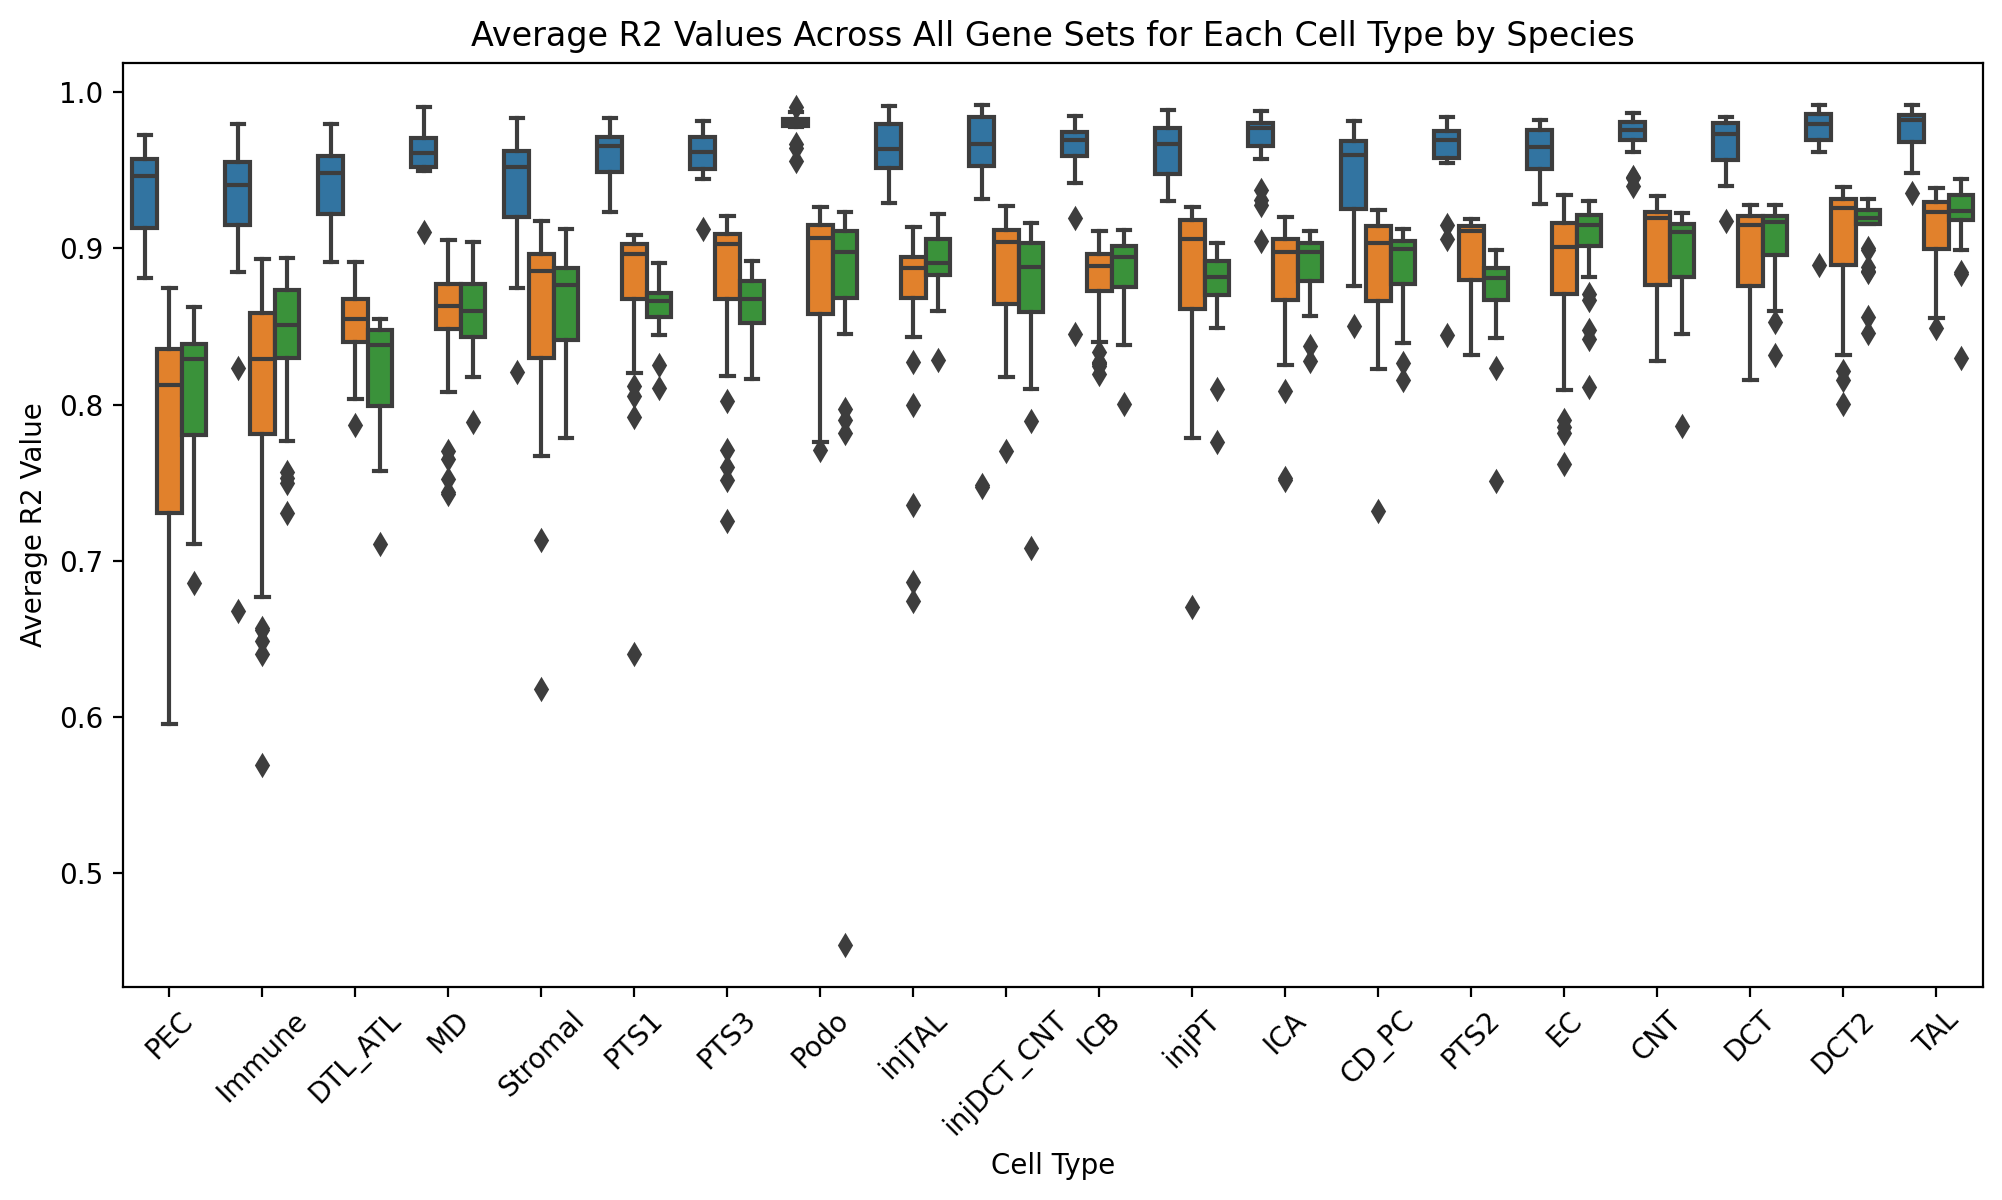

In [580]:
# Calculate the overall average R2 value for each cell type
overall_avg_r2 = combined_data[~combined_data["orig_ident"].isin(human_samples)].groupby('cell_type')['mean_r2_value'].mean().sort_values()

# Get the sorted order of cell types
sorted_cell_types = overall_avg_r2.index.tolist()

# Create a boxplot with the sorted order of cell types
plt.figure(figsize=(12, 6))
sns.boxplot(x='cell_type', y='mean_r2_value', hue='species', data=combined_data, palette=custom_palette, order=sorted_cell_types)
plt.title("Average R2 Values Across All Gene Sets for Each Cell Type by Species")
plt.xlabel("Cell Type")
plt.ylabel("Average R2 Value")
plt.xticks(rotation=45)
plt.legend().set_visible(False)

plt.show()

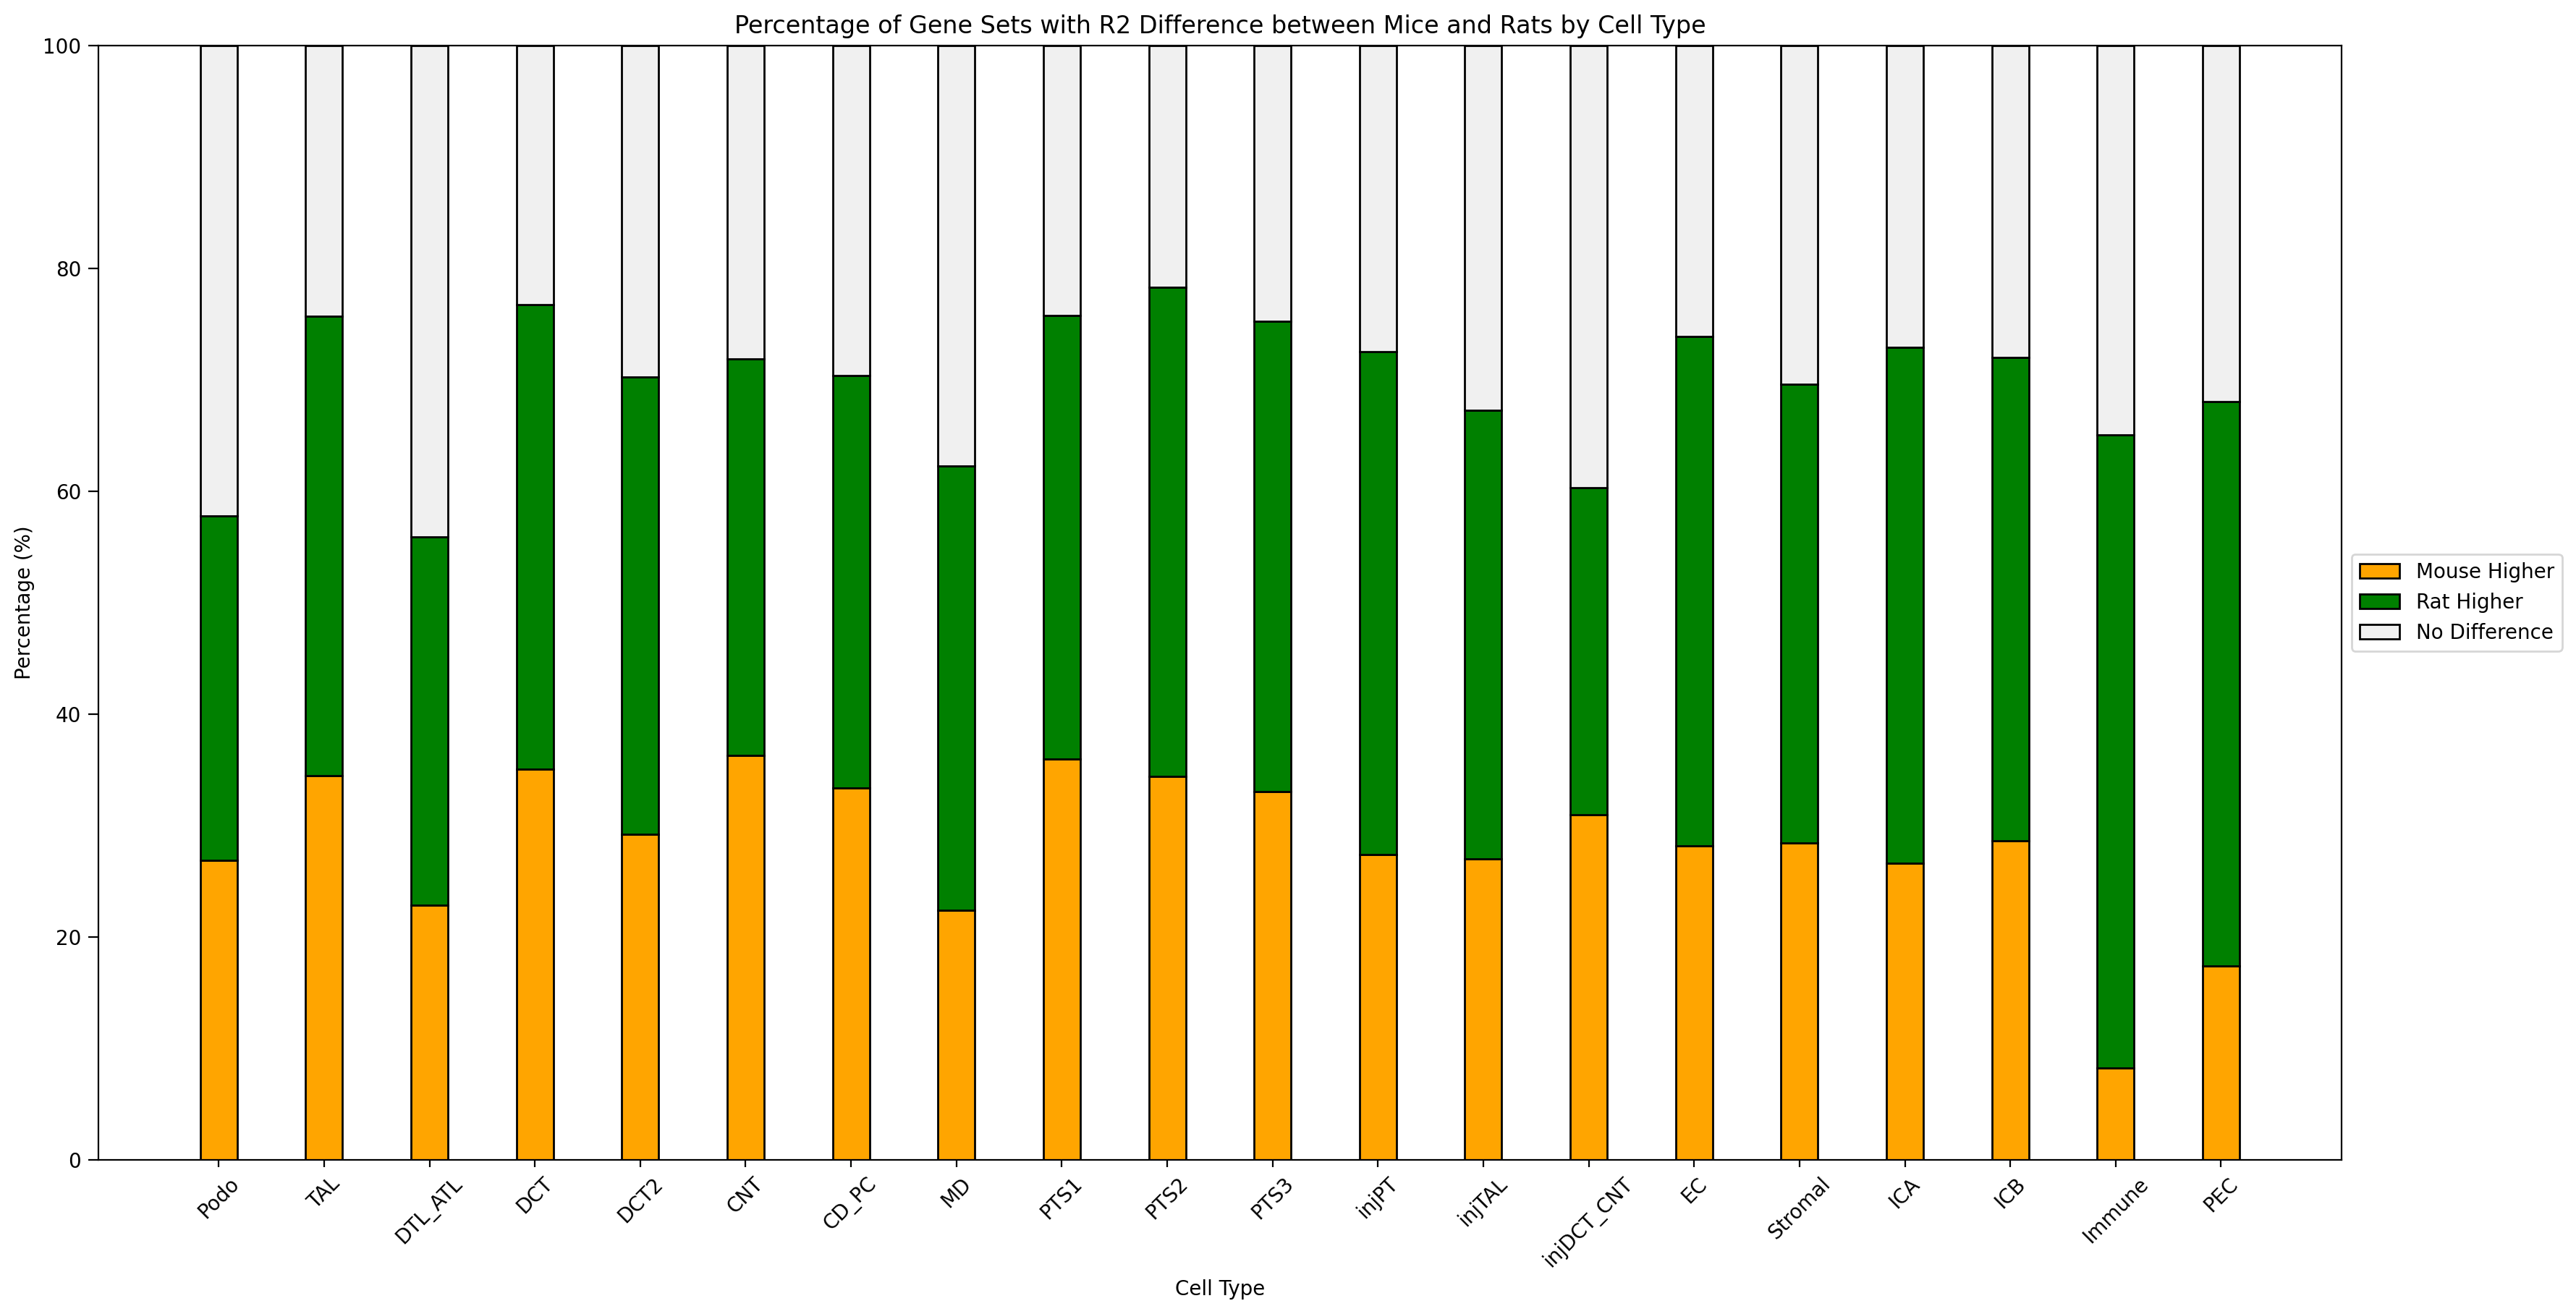

In [574]:
### import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multitest as mt
from statsmodels.stats.multitest import multipletests
from scipy.stats import ranksums
import numpy as np

# Initialize lists to store plot data
cell_type_names = []
percent_mouse_highers = []
percent_rat_highers = []
percent_no_differences = []

# Loop through each cell type
for cell_type in cell_types:
    # Read the R2 file for the current cell type
    r2_file_path = f"{r2_base_path}{cell_type}.csv"
    r2_data = pd.read_csv(r2_file_path, index_col=0)
    
    # Read the marker gene sets file for the current cell type
    marker_file_path = f".../Atlas/scSPECTRA/multispecies_marker_new/statistic/{cell_type}_marker_features.csv"
    marker_data = pd.read_csv(marker_file_path)
    marker_data = marker_data[(marker_data['LogFoldChange'] > 0) & (marker_data['FDR'] < 0.05)]
    # Select the top 100 marker gene sets based on FDR
    #top_markers = marker_data.nsmallest(100, 'FDR')['GeneSet']
    #top_markers = marker_data['GeneSet']
    top_markers = marker_data.nlargest(100, 'MeanInGroup')['GeneSet']

    # Filter the R2 data to include only the top 100 marker gene sets
    #r2_data_filtered = r2_data[top_markers]
    r2_data_filtered = r2_data

    # Reshape the R2 data
    r2_data_melted = r2_data_filtered.reset_index().melt(id_vars='index', var_name='gene_set', value_name='r2_value')

    # Merge with metadata to include species information
    combined_data = pd.merge(r2_data_melted, metadata, left_on='index', right_on='orig_ident')

    # Filter data for mice and rats
    data_mice = combined_data[combined_data['species'] == 'mouse']
    data_rats = combined_data[combined_data['species'] == 'rat']

    # Perform Wilcoxon test for each gene set
    results = []
    for gene_set in combined_data['gene_set'].unique():
        mouse_values = data_mice[data_mice['gene_set'] == gene_set]['r2_value']
        rat_values = data_rats[data_rats['gene_set'] == gene_set]['r2_value']
        stat, p = ranksums(mouse_values, rat_values, alternative='two-sided')
        results.append({'gene_set': gene_set, 'p_value': p})

    # Convert results to a DataFrame and perform FDR correction
    results_df = pd.DataFrame(results)
    reject, p_values_corrected, _, _ = multipletests(results_df['p_value'], alpha=0.05, method='fdr_bh')
    results_df['reject'] = reject

    # Determine direction of difference
    results_df['higher_in'] = np.where(results_df['reject'], 
                                       np.where(data_mice.groupby('gene_set')['r2_value'].mean() > data_rats.groupby('gene_set')['r2_value'].mean(), 
                                                'Mouse', 'Rat'), 
                                       'No Difference')

    # Count the number of gene sets higher in each species and no difference
    counts = results_df['higher_in'].value_counts()

    # Calculate percentages for each cell type
    total_gene_sets = len(results_df)
    percent_mouse_higher = (counts.get('Mouse', 0) / total_gene_sets) * 100
    percent_rat_higher = (counts.get('Rat', 0) / total_gene_sets) * 100
    percent_no_difference = (counts.get('No Difference', 0) / total_gene_sets) * 100

    # Append the results to the lists
    cell_type_names.append(cell_type)
    percent_mouse_highers.append(percent_mouse_higher)
    percent_rat_highers.append(percent_rat_higher)
    percent_no_differences.append(percent_no_difference)
    
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (4, 4)
# Set the style of the plot for publication
#sns.set(style="white", context="talk")  # 'talk' context increases font sizes

# Assuming percent_mouse_highers, percent_rat_highers, percent_no_differences, cell_type_names are defined

bar_width = 0.35
index = np.arange(len(cell_types))

plt.figure(figsize=(20, 10))

# Add edgecolor and linewidth to each bar
plt.bar(index, percent_mouse_highers, bar_width, label='Mouse Higher', color='orange', edgecolor='black', linewidth=1)
plt.bar(index, percent_rat_highers, bar_width, bottom=percent_mouse_highers, label='Rat Higher', color='green', edgecolor='black', linewidth=1)
plt.bar(index, percent_no_differences, bar_width, bottom=np.array(percent_mouse_highers) + np.array(percent_rat_highers), label='No Difference', color='#F0F0F0', edgecolor='black', linewidth=1)

plt.tick_params(axis='y', which='both', length=5)

plt.xlabel('Cell Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Gene Sets with R2 Difference between Mice and Rats by Cell Type')
plt.xticks(index, cell_type_names, rotation=45)
plt.ylim(0, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

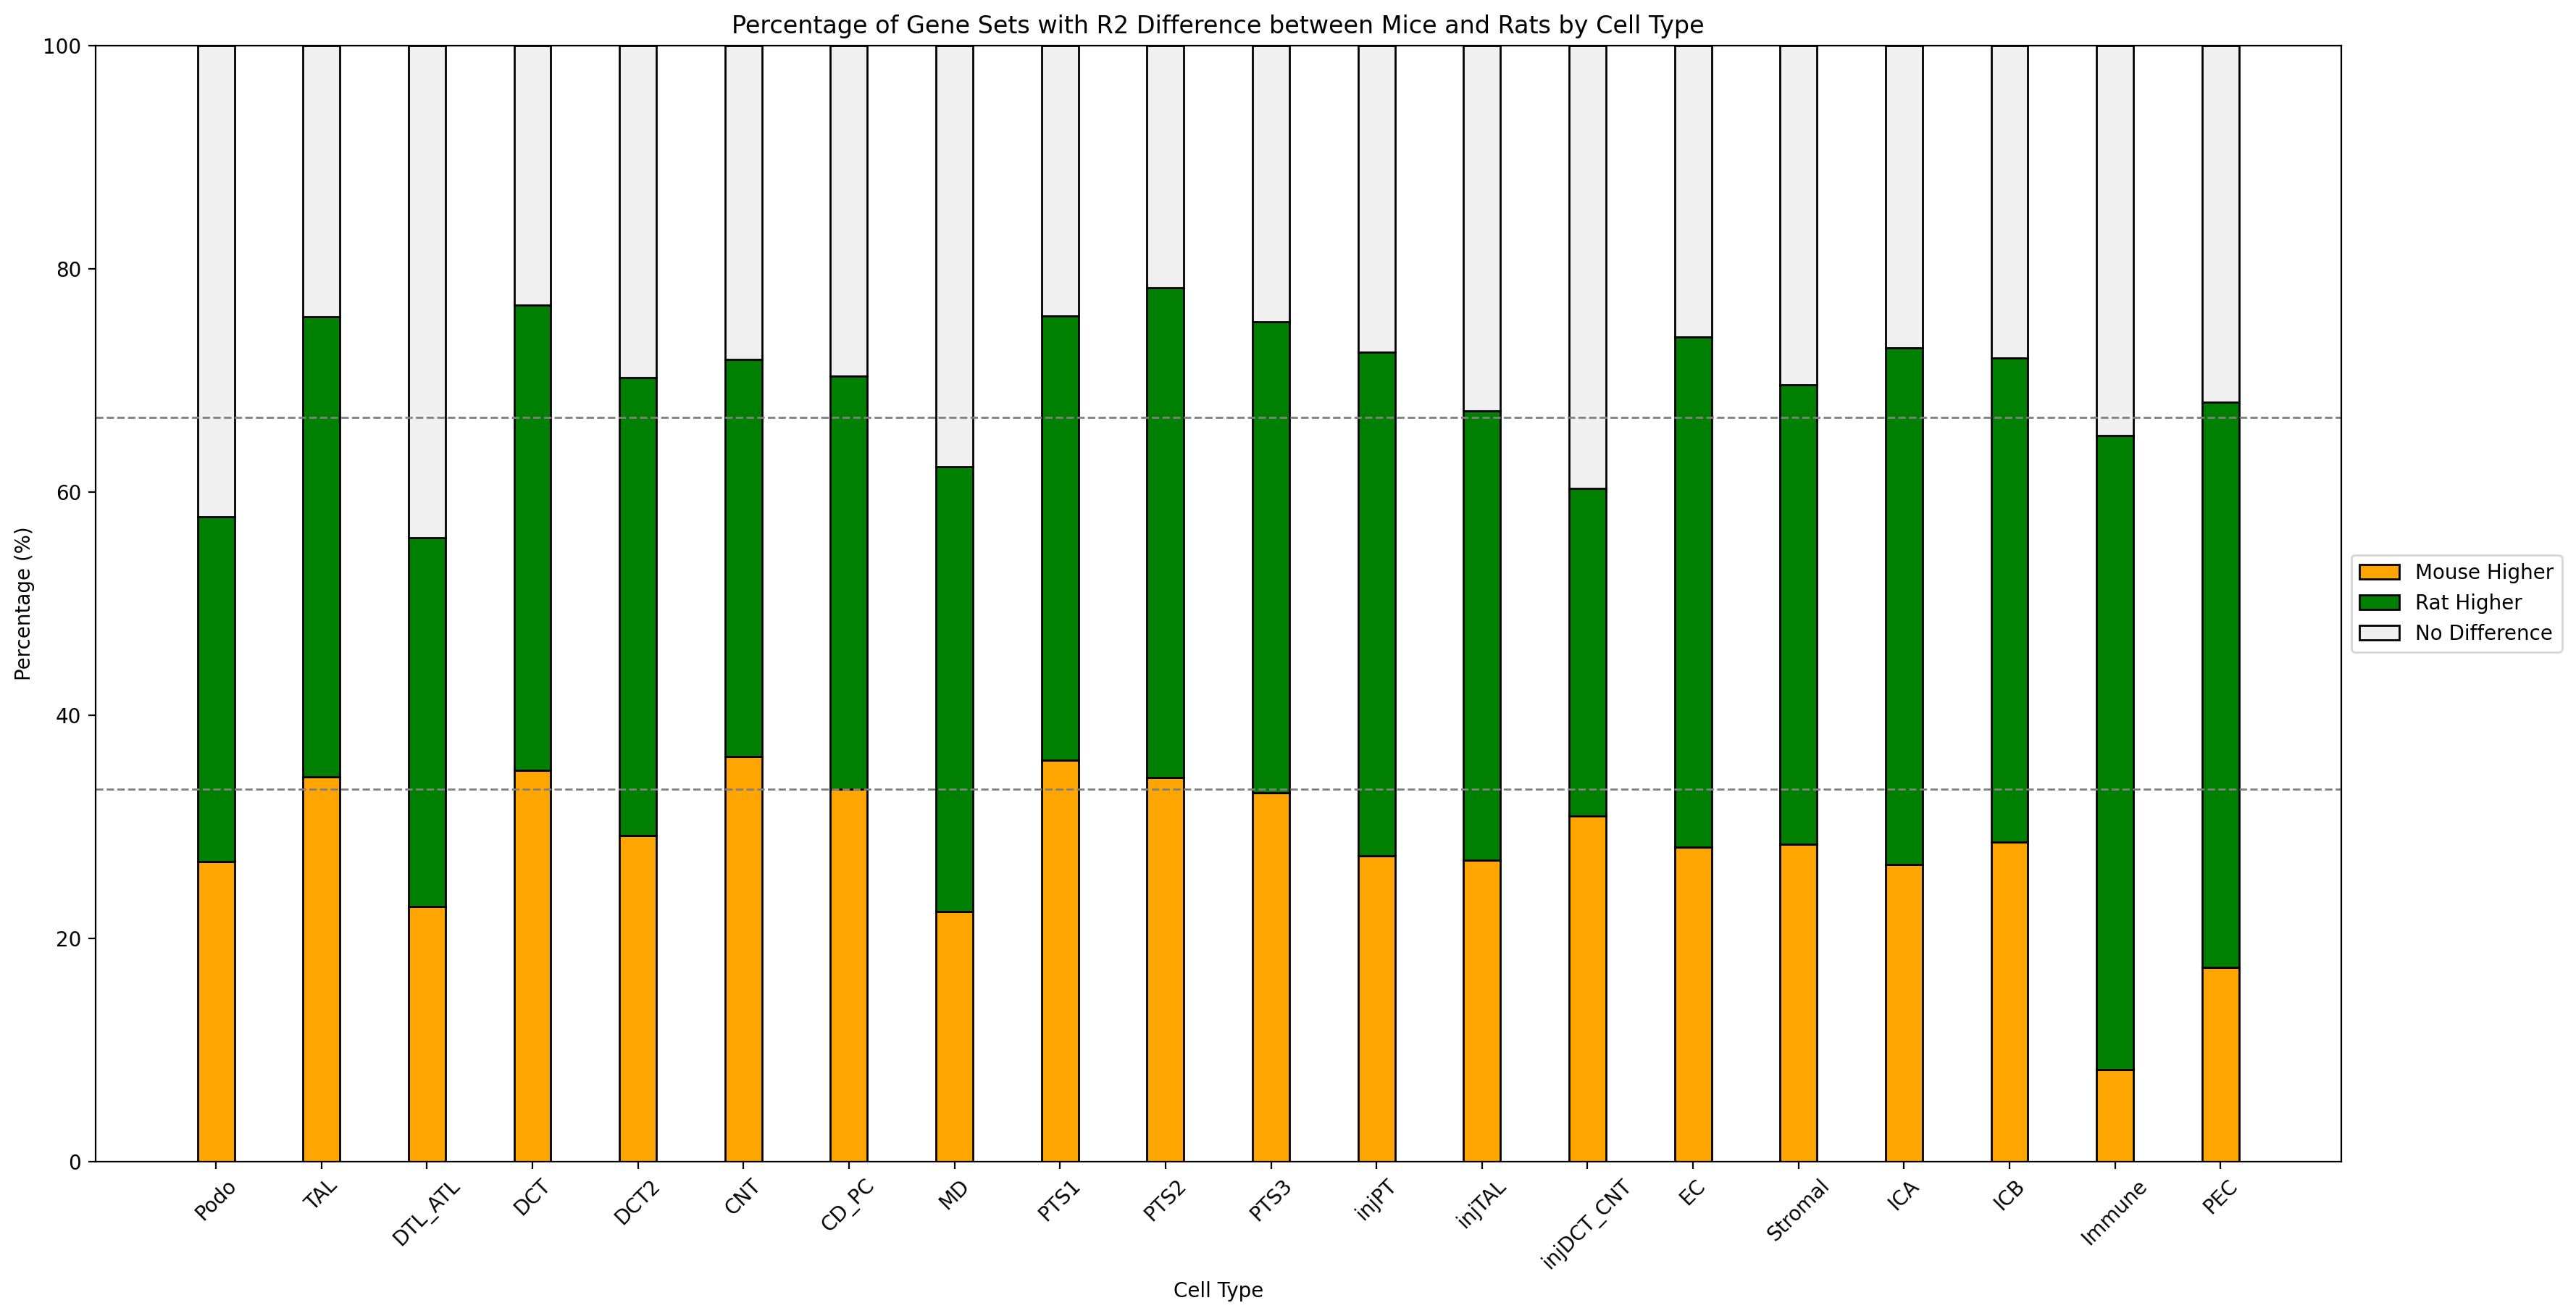

In [577]:
# Assuming percent_mouse_highers, percent_rat_highers, percent_no_differences, cell_type_names are defined

bar_width = 0.35
index = np.arange(len(cell_types))

plt.figure(figsize=(20, 10))

# Add edgecolor and linewidth to each bar
plt.bar(index, percent_mouse_highers, bar_width, label='Mouse Higher', color='orange', edgecolor='black', linewidth=1)
plt.bar(index, percent_rat_highers, bar_width, bottom=percent_mouse_highers, label='Rat Higher', color='green', edgecolor='black', linewidth=1)
plt.bar(index, percent_no_differences, bar_width, bottom=np.array(percent_mouse_highers) + np.array(percent_rat_highers), label='No Difference', color='#F0F0F0', edgecolor='black', linewidth=1)

plt.xlabel('Cell Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Gene Sets with R2 Difference between Mice and Rats by Cell Type')
plt.xticks(index, cell_type_names, rotation=45)
plt.ylim(0, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adding dotted lines at 1/3 and 2/3 of 100
plt.axhline(y=100/3, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=2*100/3, color='gray', linestyle='--', linewidth=1)
plt.yticks(np.arange(0, 101, 20)) 

plt.show()


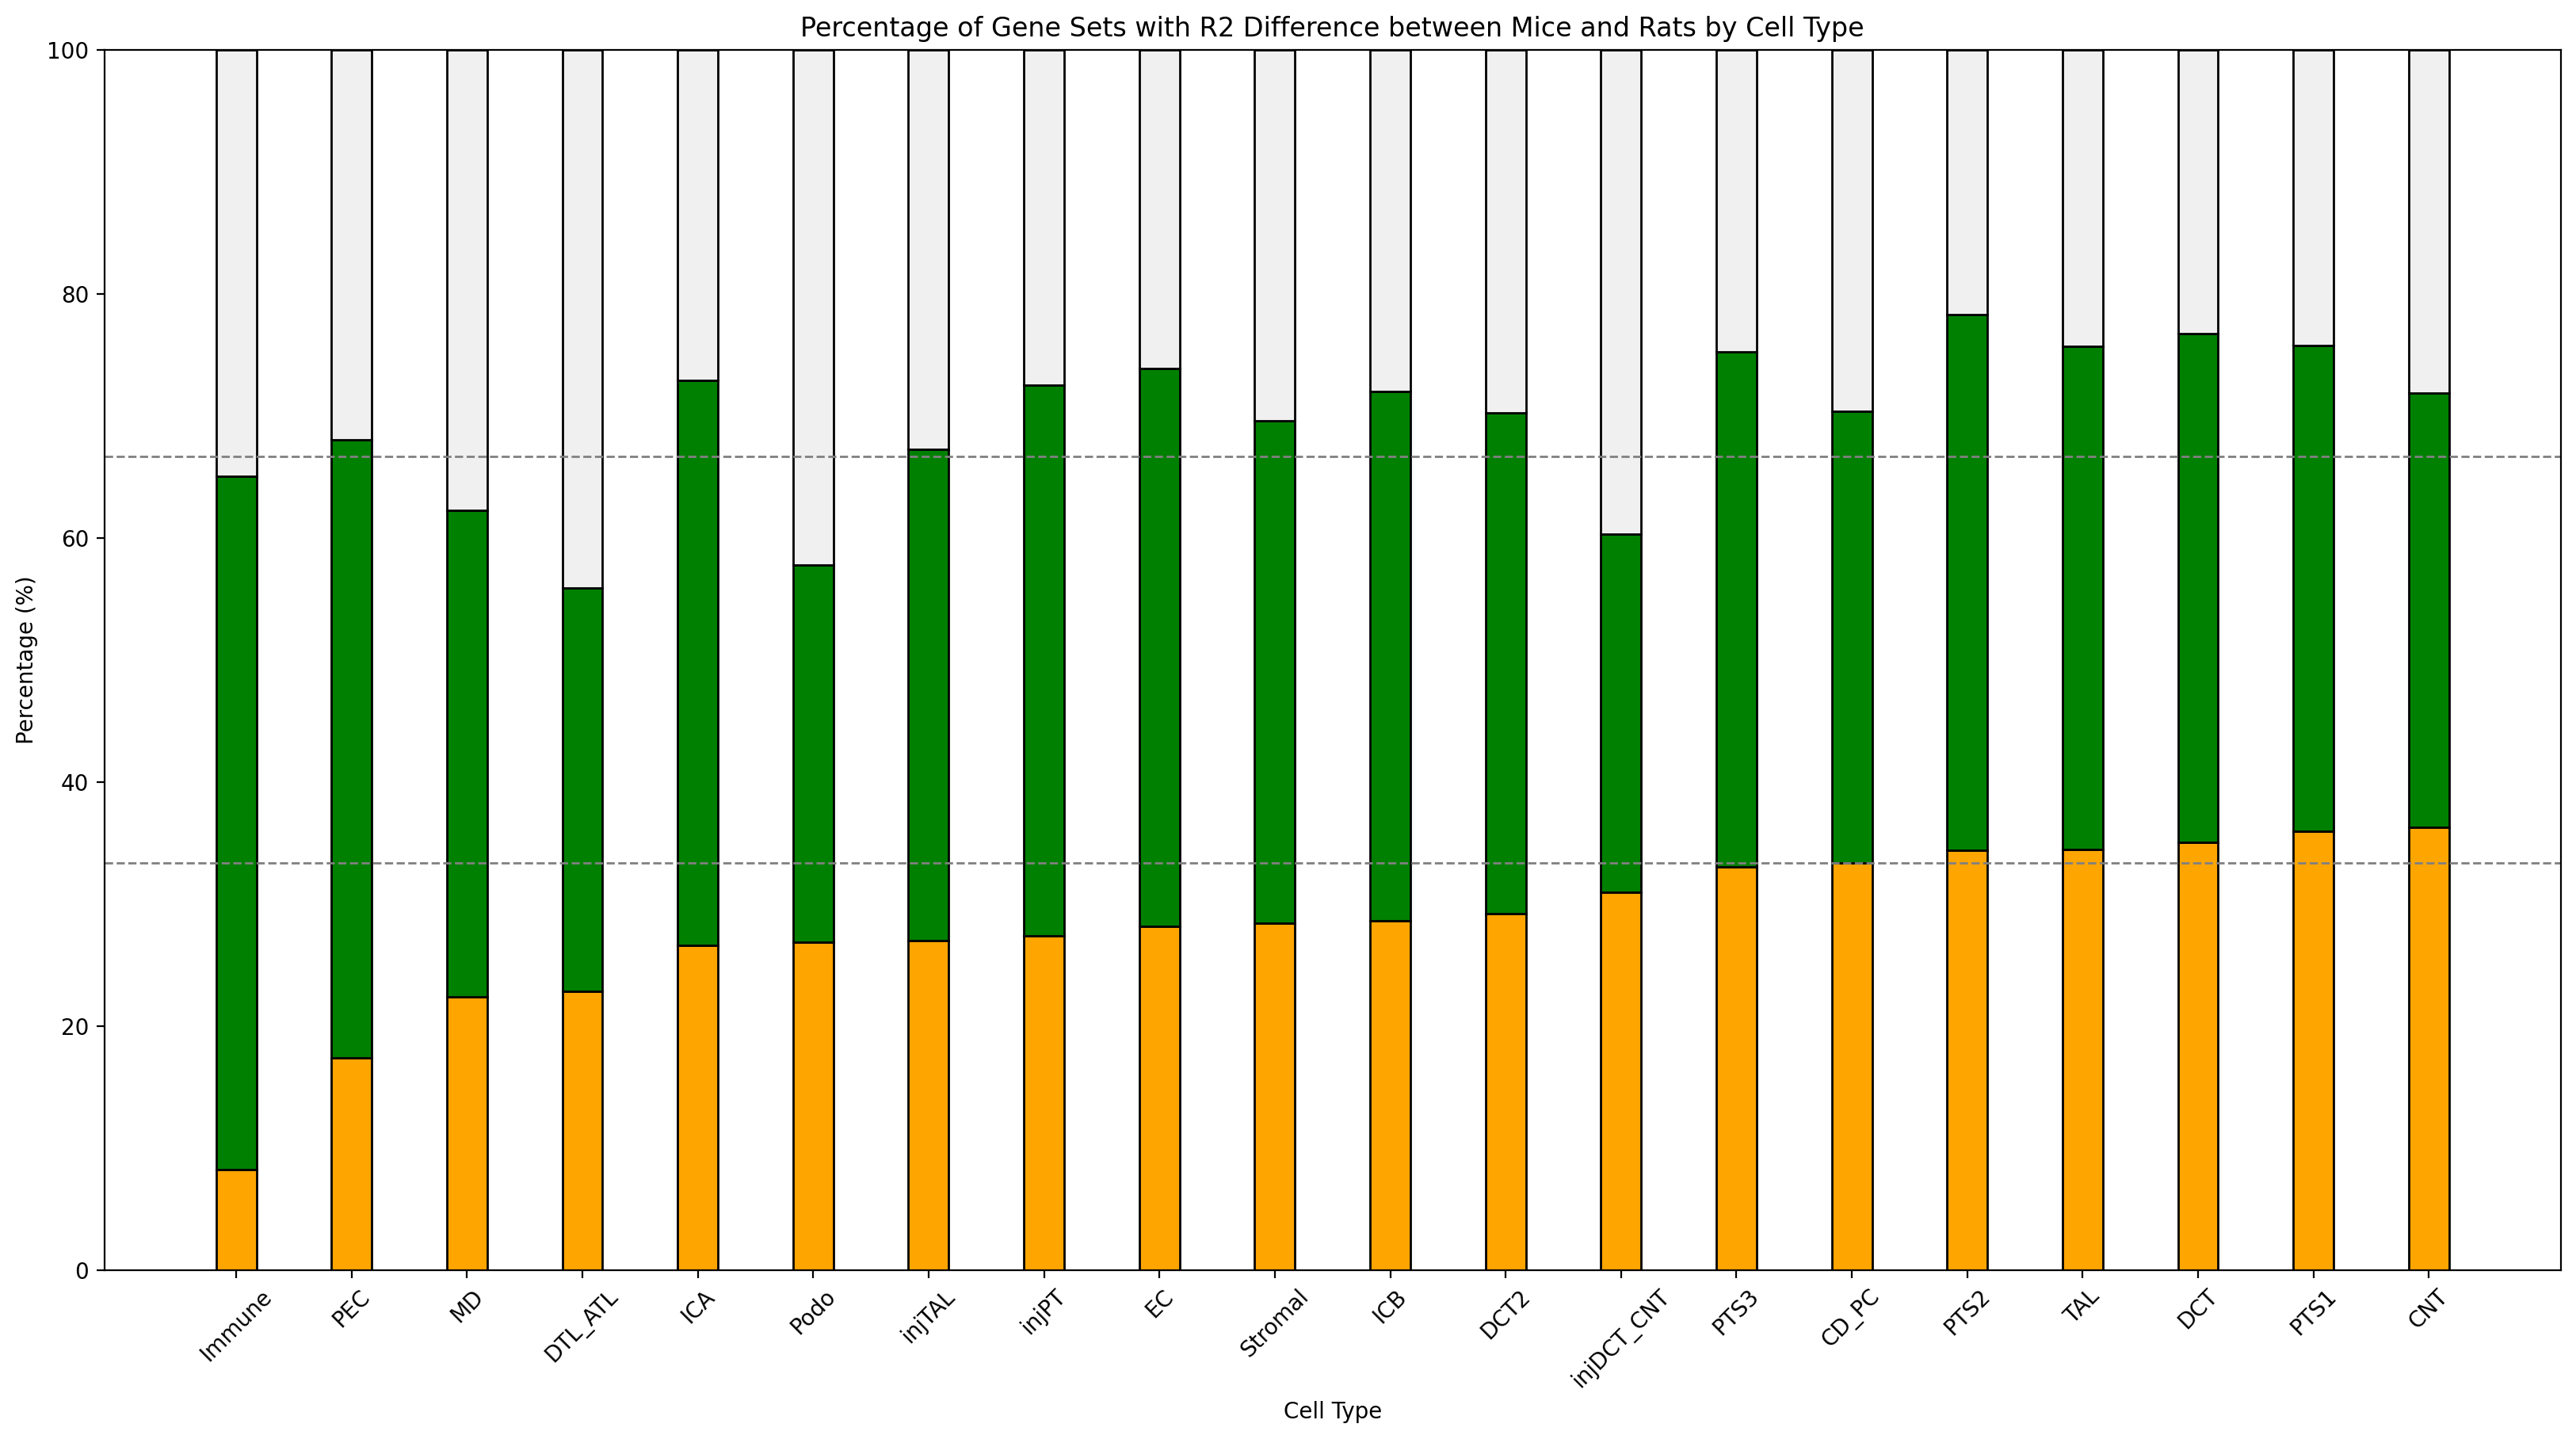

In [578]:
# Sort cell_types based on the percentage of gene sets significantly higher in mice
mouse_higher_counts = {cell_type: percent for cell_type, percent in zip(cell_type_names, percent_mouse_highers)}
sorted_cell_types = sorted(mouse_higher_counts, key=mouse_higher_counts.get)

# Reorder the plotting data based on sorted cell types
sorted_percent_mouse_highers = [percent_mouse_highers[cell_type_names.index(ct)] for ct in sorted_cell_types]
sorted_percent_rat_highers = [percent_rat_highers[cell_type_names.index(ct)] for ct in sorted_cell_types]
sorted_percent_no_differences = [percent_no_differences[cell_type_names.index(ct)] for ct in sorted_cell_types]
sorted_cell_type_names = sorted_cell_types

# Plotting with the sorted data
bar_width = 0.35
index = np.arange(len(sorted_cell_type_names))

plt.figure(figsize=(20, 10))

# Plot using the sorted data
plt.bar(index, sorted_percent_mouse_highers, bar_width, label='Mouse Higher', color='orange', edgecolor='black', linewidth=1)
plt.bar(index, sorted_percent_rat_highers, bar_width, bottom=sorted_percent_mouse_highers, label='Rat Higher', color='green', edgecolor='black', linewidth=1)
plt.bar(index, sorted_percent_no_differences, bar_width, bottom=np.array(sorted_percent_mouse_highers) + np.array(sorted_percent_rat_highers), label='No Difference', color='#F0F0F0', edgecolor='black', linewidth=1)

plt.xlabel('Cell Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Gene Sets with R2 Difference between Mice and Rats by Cell Type')
plt.xticks(index, sorted_cell_type_names, rotation=45)
plt.ylim(0, 100)
plt.axhline(y=100/3, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=2*100/3, color='gray', linestyle='--', linewidth=1)
plt.yticks(np.arange(0, 101, 20)) 
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [4]:
#####add if else error handling in cases if all samples of condition are missing a cell type (FA in MD)

In [130]:
# Define the paths
metadata_path = ".../Atlas/scSPECTRA/multispecies/multispecies_metadata_complete.csv"  # Replace with the correct metadata file path
r2_base_path = ".../Atlas/scSPECTRA/onthefly/rodents_on_human_disease/V4/R2/R2_"


In [547]:


import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multitest as mt
import numpy as np

# Create a new column by concatenating feature1 and feature2
metadata['model'] = metadata['species'].astype(str) + '_' + metadata['condition_harmonized2'].astype(str) + '_' + metadata['proj'].astype(str)

r2_base_path = ".../Atlas/scSPECTRA/onthefly/rodents_on_human_disease/V4/R2/R2_"

metadata["model"].value_counts()


mouse_DKD = metadata[metadata['model'] == 'mouse_DKD_m_humphreys_DKD']['orig_ident'].tolist()
mouse_AKI = metadata[metadata['model'] == 'mouse_AKI_m_humphrey_IRI']['orig_ident'].tolist()
rat_H_CKD = metadata[metadata['model'] == 'rat_H-CKD_r_doca']['orig_ident'].tolist()
rat_DKD = metadata[metadata['model'] == 'rat_DKD_r_ZSF']['orig_ident'].tolist()
human_controls = metadata[(metadata['species'] == 'human') & (metadata['disease'] == "healthy")]['orig_ident'].tolist()
mouse_FA = ['LYZ2_eYFP', 'GGT_eYFP', 'PDGFR-eYFP', 'FA3']

cell_type = "PEC"

# Load the metadata
metadata = pd.read_csv(metadata_path)

# Create a new column by concatenating 'species' and 'condition_harmonized2'
metadata['model'] = metadata['species'].astype(str) + '_' + metadata['condition_harmonized2'].astype(str) + '_' + metadata['proj'].astype(str)

# Read the R2 file for the specific cell type
r2_file_path = f"{r2_base_path}{cell_type}.csv"
r2_data = pd.read_csv(r2_file_path, index_col=0)
#r2_data = r2_data[~r2_data.index.isin(samples_in_reference)]

# Model of interest for comparison
model_of_interest = "rat_H-CKD_r_doca" # Example, can be replaced

# Subset the metadata to include only the samples present in the R2 file
metadata_subset = metadata[metadata['orig_ident'].isin(r2_data.index)]


# Read the marker gene sets file for the current cell type
marker_file_path = f".../Atlas/scSPECTRA/multispecies_marker_new/statistic/{cell_type}_marker_features.csv"
marker_data = pd.read_csv(marker_file_path)
marker_data = marker_data[(marker_data['LogFoldChange'] > 0) & (marker_data['FDR'] < 0.05)]
# Select the top 100 marker gene sets based on FDR
#top_markers = marker_data.nsmallest(100, 'FDR')['GeneSet']
#top_markers = marker_data['GeneSet']
top_markers = marker_data.nlargest(100, 'MeanInGroup')['GeneSet']

# Filter the R2 data to include only the top 100 marker gene sets
r2_data = r2_data[top_markers]

# Separate the R2 data into two groups: model of interest and others
#samples_model_of_interest = metadata_subset[metadata_subset['model'] == model_of_interest]['orig_ident'].tolist()

#samples_model_of_interest = mouse_FA

#samples_model_of_interest = metadata_subset[(metadata_subset['proj'] == "r_ZSF") & (metadata_subset['disease'] == "diseased")]['orig_ident'].tolist()
#samples_other_models = metadata_subset[(metadata_subset['species'].isin(["human", "mouse"])) & (metadata_subset['disease'] == "healthy")]['orig_ident'].tolist()

#samples_model_of_interest = metadata_subset[(metadata_subset['species'] == "human") & (metadata_subset['disease'] == "healthy")]['orig_ident'].tolist()

samples_model_of_interest = metadata_subset[(metadata_subset['species'] == "rat")]['orig_ident'].tolist()

#samples_other_models = metadata_subset[metadata_subset['model'] != model_of_interest]['orig_ident'].tolist()
#samples_other_models = metadata_subset[~metadata_subset['orig_ident'].isin(samples_model_of_interest)]['orig_ident'].tolist()
#samples_other_models = metadata_subset[metadata_subset['orig_ident'].isin(human_controls)]['orig_ident'].tolist()
#samples_other_models = metadata_subset[metadata_subset['orig_ident'].isin(human_controls)]['orig_ident'].tolist()
#samples_other_models = metadata_subset[(metadata_subset['disease'] == "diseased") & (metadata_subset['orig_ident'] != "human")]['orig_ident'].tolist()
samples_other_models = metadata_subset[(metadata_subset['species'] == "mouse")]['orig_ident'].tolist()

r2_model_of_interest = r2_data.loc[samples_model_of_interest]
r2_other_models = r2_data.loc[samples_other_models]

# Initialize lists to store results
p_values = []
mean_model_of_interest = []
mean_other_models = []
log_fold_changes = []
features = r2_data.columns

# Perform Wilcoxon rank-sum test, calculate means and log fold change
for feature in features:
    # Wilcoxon rank-sum test
    stat, p = stats.ranksums(r2_model_of_interest[feature].dropna(), r2_other_models[feature].dropna(), alternative='greater')
    p_values.append(p)

    # Mean calculations
    mean_interest = r2_model_of_interest[feature].mean()
    mean_others = r2_other_models[feature].mean()
    mean_model_of_interest.append(mean_interest)
    mean_other_models.append(mean_others)

    # Log2 Fold Change: log2(Mean Model of Interest / Mean Other Models)
    log_fold_change = np.log2((mean_interest + 1e-10) / (mean_others + 1e-10))
    log_fold_changes.append(log_fold_change)

# Adjust p-values for multiple testing using FDR correction
p_adjusted = mt.multipletests(p_values, method='fdr_bh')[1]

# Create a DataFrame to summarize the results including mean and logFC
summary_df = pd.DataFrame({
    'Feature': features,
    'Mean Model of Interest': mean_model_of_interest,
    'Mean Other Models': mean_other_models,
    'Log2 Fold Change': log_fold_changes,
    'P-Value': p_values,
    'Adjusted P-Value': p_adjusted
})

# Sort the results by Adjusted P-Value
sorted_summary_df = summary_df.sort_values('Log2 Fold Change', ascending = False)

print(sorted_summary_df[:50])

                                                                                         Feature  \
95  GO.0002043.blood.vessel.endothelial.cell.proliferation.involved.in.sprouting.angiogenesis.BP   
55                                                          GO.0002347.response.to.tumor.cell.BP   
93                   GO.0010664.negative.regulation.of.striated.muscle.cell.apoptotic.process.BP   
82                    GO.0010667.negative.regulation.of.cardiac.muscle.cell.apoptotic.process.BP   
78                            GO.0010656.negative.regulation.of.muscle.cell.apoptotic.process.BP   
70                                                                          GO.0031672.A.band.CC   
42                                                 GO.0035461.vitamin.transmembrane.transport.BP   
98                                          GO.0010658.striated.muscle.cell.apoptotic.process.BP   
73                                      GO.0034350.regulation.of.glial.cell.apoptotic.process.BP   


/tmp/ipykernel_1754847/1475952034.py:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(r2_mouse_only[gene_set], label="Mouse", shade=True, alpha=0.5, color="#ff7f0e", clip=(0, 1))
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1754847/1475952034.py:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; settin

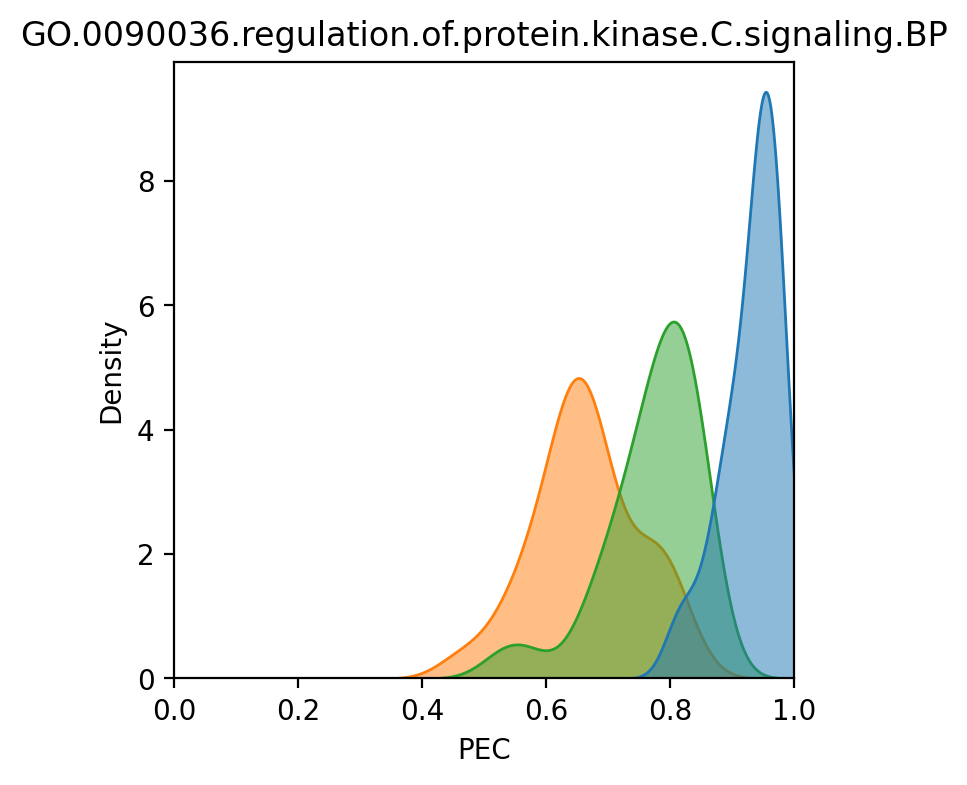

In [589]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Load the metadata
metadata = pd.read_csv(metadata_path)

# Create a new column by concatenating feature1 and feature2
metadata['model'] = metadata['species'].astype(str) + '_' + metadata['condition_harmonized2'].astype(str) + '_' + metadata['proj'].astype(str)


# Set the cell type and gene set of interest
cell_type = "PEC"  # Example cell type
#gene_set = "GO.0001573.ganglioside.metabolic.process.BP"  # Replace with the actual gene set name
#gene_set = "GO.0010893.positive.regulation.of.steroid.biosynthetic.process.BP"  # Replace with the actual gene set name
gene_set = "GO.0090036.regulation.of.protein.kinase.C.signaling.BP"
#gene_set = "GO.0002043.blood.vessel.endothelial.cell.proliferation.involved.in.sprouting.angiogenesis.BP"
#gene_set = "GO.0051450.myoblast.proliferation.BP"


# Read the R2 file for the specific cell type
r2_file_path = f"{r2_base_path}{cell_type}.csv"
r2_data = pd.read_csv(r2_file_path, index_col=0)


# Subset the R2 data to the gene set of interest
r2_subset = r2_data[[gene_set]]


# Subset the metadata to include only the samples present in the R2 file
metadata_subset = metadata[metadata['orig_ident'].isin(r2_subset.index)]


# Create lists of samples for rat and mouse

mouse_only = metadata_subset[(metadata_subset['species'] == 'mouse')]['orig_ident'].tolist()
rat_only = metadata_subset[(metadata_subset['species'] == 'rat')]['orig_ident'].tolist()
human_healthy_only = metadata_subset[(metadata_subset['species'] == 'human') & (metadata_subset['disease'] == 'healthy')]['orig_ident'].tolist()

r2_mouse_only = r2_subset.loc[mouse_only]
r2_rat_only = r2_subset.loc[rat_only]
r2_human_only = r2_subset.loc[human_healthy_only]





sns.kdeplot(r2_mouse_only[gene_set], label="Mouse", shade=True, alpha=0.5, color="#ff7f0e", clip=(0, 1))
sns.kdeplot(r2_rat_only[gene_set], label="Rat", shade=True, alpha=0.5, color="#2ca02c", clip=(0, 1))
sns.kdeplot(r2_human_only[gene_set], label="Human", shade=True, alpha=0.5, color="#1f77b4", clip=(0, 1))



plt.title(gene_set)
plt.xlabel(cell_type)
plt.ylabel("Density")

# Move the legend to the right of the plot
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(0, 1)  # Set x-axis limit from 0 to 1
plt.show()

/tmp/ipykernel_1754847/665877036.py:64: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(r2_rat_doca_controls[gene_set], label="Rat Control", shade=True, alpha=0.5, color="lightsteelblue", clip=(0, 1))
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1754847/665877036.py:98: FutureWarning: 

`shade` is now deprecated in favor

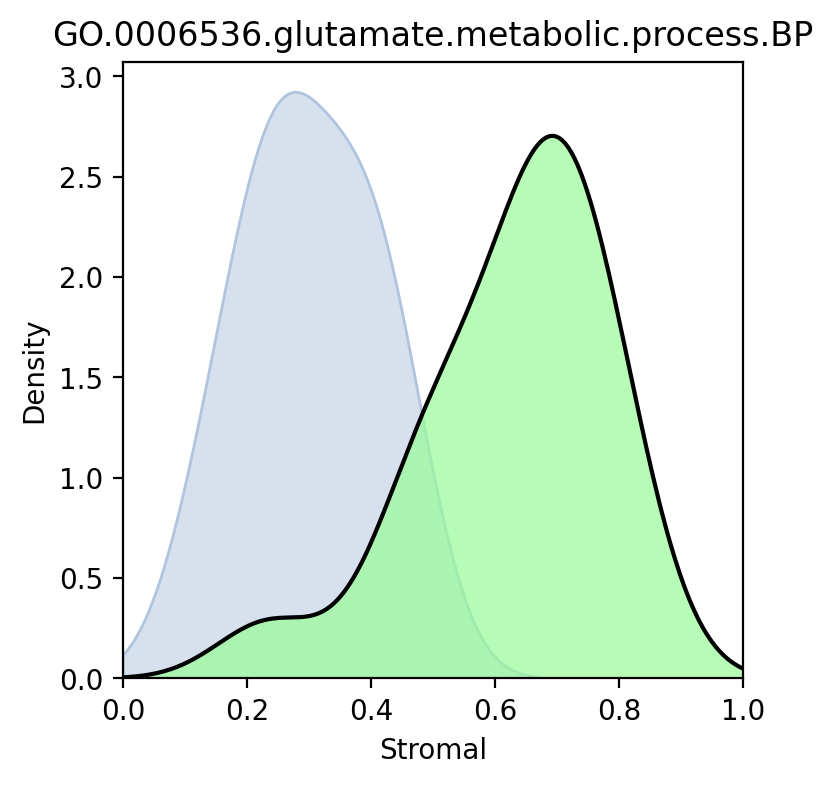

In [519]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the metadata
metadata = pd.read_csv(metadata_path)

r2_base_path = ".../Atlas/scSPECTRA/onthefly/rodents_on_human_disease/V4/R2/R2_"


# Create a new column by concatenating feature1 and feature2
metadata['model'] = metadata['species'].astype(str) + '_' + metadata['condition_harmonized2'].astype(str) + '_' + metadata['proj'].astype(str)


# Set the cell type and gene set of interest
cell_type = "Stromal"  # Example cell type
#gene_set = "GO.0001573.ganglioside.metabolic.process.BP"  # Replace with the actual gene set name
#gene_set = "GO.0010893.positive.regulation.of.steroid.biosynthetic.process.BP"  # Replace with the actual gene set name
gene_set = "GO.0006536.glutamate.metabolic.process.BP"


# Read the R2 file for the specific cell type
r2_file_path = f"{r2_base_path}{cell_type}.csv"
r2_data = pd.read_csv(r2_file_path, index_col=0)


# Subset the R2 data to the gene set of interest
r2_subset = r2_data[[gene_set]]


# Subset the metadata to include only the samples present in the R2 file
metadata_subset = metadata[metadata['orig_ident'].isin(r2_subset.index)]


# Create lists of samples for rat and mouse


mouse_DKD = metadata_subset[metadata_subset['model'] == 'mouse_DKD_m_humphreys_DKD']['orig_ident'].tolist()
mouse_AKI = metadata_subset[metadata_subset['model'] == 'mouse_AKI_m_humphrey_IRI']['orig_ident'].tolist()
rat_H_CKD = metadata_subset[metadata_subset['model'] == 'rat_H-CKD_r_doca']['orig_ident'].tolist()
rat_DKD = metadata_subset[metadata_subset['model'] == 'rat_DKD_r_ZSF']['orig_ident'].tolist()
mouse_FA = ['LYZ2_eYFP', 'GGT_eYFP', 'PDGFR-eYFP', 'FA3']
human_healthy = metadata_subset[(metadata_subset['species'] == 'human') & (metadata_subset['disease'] == 'healthy')]['orig_ident'].tolist()











mouse_only = metadata_subset[(metadata_subset['proj'] == 'm_humphreys_DKD') & (metadata_subset['disease'] == 'healthy')]['orig_ident'].tolist()
#rat_only = metadata_subset[(metadata_subset['proj'] == 'r_doca') & (metadata_subset['disease'] == 'healthy')]['orig_ident'].tolist()
rat_doca_controls = metadata_subset[(metadata_subset['species'] == 'rat') & (metadata_subset['disease'] == 'healthy')]['orig_ident'].tolist()
r2_rat_doca_controls = r2_subset.loc[rat_doca_controls]

#r2_mouse_only = r2_subset.loc[mouse_only]
#r2_rat_only = r2_subset.loc[rat_only]
#sns.kdeplot(r2_mouse_only[gene_set], label="Mouse", shade=True, alpha=0.5, color="#ff7f0e", clip=(0, 1))
#sns.kdeplot(r2_rat_only[gene_set], label="Rat", shade=True, alpha=0.5, color="#2ca02c", clip=(0, 1))
sns.kdeplot(r2_rat_doca_controls[gene_set], label="Rat Control", shade=True, alpha=0.5, color="lightsteelblue", clip=(0, 1))

##human_diseased = metadata_subset[(metadata_subset['species'] == 'human') & (metadata_subset['disease'] == 'diseased')]['orig_ident'].tolist()
#r2_human_diseased = r2_subset.loc[human_diseased]
#sns.kdeplot(r2_human_diseased[gene_set], label="human_diseased", shade=True, alpha=0.2, color="red", clip=(0, 1))






r2_mouse_DKD = r2_subset.loc[mouse_DKD]
r2_mouse_AKI = r2_subset.loc[mouse_AKI]
r2_rat_H_CKD = r2_subset.loc[rat_H_CKD]

r2_rat_DKD = r2_subset.loc[rat_DKD]

r2_mouse_FA = r2_subset.loc[mouse_FA]
r2_human_healthy = r2_subset.loc[human_healthy]

# Plotting with new color scheme
#sns.kdeplot(r2_mouse_DKD[gene_set], label="Mouse_DKD", shade=True, alpha=0.8, color="#DC143C", clip=(0, 1), linestyle="")
#sns.kdeplot(r2_mouse_DKD[gene_set], label="Mouse_DKD", shade=False, alpha=0.9, color="black", clip=(0, 1), linestyle="--")

#sns.kdeplot(r2_mouse_FA[gene_set], label="Mouse_FA", shade=True, alpha=0.8, color="#B15641", clip=(0, 1), linestyle="")
#sns.kdeplot(r2_mouse_FA[gene_set], label="Mouse_FA", shade=False, alpha=1.0, color="black", clip=(0, 1), linestyle=":")

#sns.kdeplot(r2_mouse_AKI[gene_set], label="Mouse_AKI", shade=True, alpha=0.8, color="#FFD700", clip=(0, 1), linestyle="")
#sns.kdeplot(r2_mouse_AKI[gene_set], label="Mouse_AKI", shade=False, alpha=0.5, color="black", clip=(0, 1), linestyle="-")

#sns.kdeplot(r2_rat_DKD[gene_set], label="Rat_ZSF1", shade=True, alpha=1.0, color="#1C775E", clip=(0, 1), linestyle="--")
#sns.kdeplot(r2_rat_DKD[gene_set], label="Rat_ZSF1", shade=False, alpha=1.0, color="black", clip=(0, 1), linestyle="--")


sns.kdeplot(r2_rat_H_CKD[gene_set], label="Rat DOCA", shade=True, alpha=0.7, color="#98FB98", clip=(0, 1))
sns.kdeplot(r2_rat_H_CKD[gene_set], label="Rat DOCA", shade=False, alpha=1.0, color="black", clip=(0, 1))
#sns.kdeplot(r2_mouse_Control[gene_set], label="Mouse_Control", shade=True, alpha=0.5, color="yellow", linestyle="--", clip=(0, 1))
#sns.kdeplot(r2_rat_Control[gene_set], label="Rat_Control", shade=True, alpha=0.5, color="green", linestyle="--", clip=(0, 1))


#sns.kdeplot(r2_human_healthy[gene_set], label="human_healthy", shade=True, alpha=0.5, color="#1f77b4", clip=(0, 1))
#sns.kdeplot(r2_human_healthy[gene_set], label="", shade=True, alpha=0.5, color="black", clip=(0, 1), linestyle="--")


plt.title(gene_set)
plt.xlabel(cell_type)
plt.ylabel("Density")

# Move the legend to the right of the plot
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(0, 1)  # Set x-axis limit from 0 to 1
plt.show()

/tmp/ipykernel_1754847/1938058401.py:57: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(r2_rat_doca_controls[gene_set], label="Rat Control", shade=True, alpha=0.5, color="lightsteelblue", clip=(0, 1))
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1754847/1938058401.py:61: FutureWarning: 

`shade` is now deprecated in fav

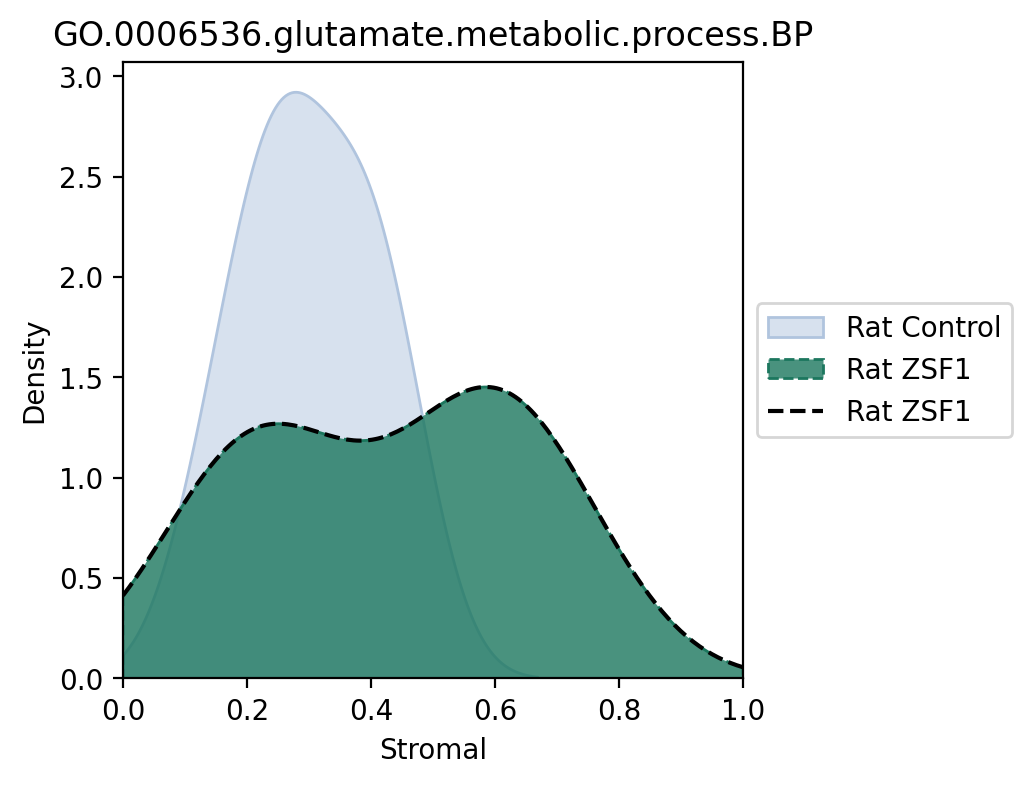

In [532]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the metadata
metadata = pd.read_csv(metadata_path)

# Create a new column by concatenating feature1 and feature2
metadata['model'] = metadata['species'].astype(str) + '_' + metadata['condition_harmonized2'].astype(str) + '_' + metadata['proj'].astype(str)


# Set the cell type and gene set of interest
cell_type = "Stromal"  # Example cell type
#gene_set = "GO.0001573.ganglioside.metabolic.process.BP"  # Replace with the actual gene set name
#gene_set = "GO.0010893.positive.regulation.of.steroid.biosynthetic.process.BP"  # Replace with the actual gene set name
gene_set = "GO.0006536.glutamate.metabolic.process.BP"


# Read the R2 file for the specific cell type
r2_file_path = f"{r2_base_path}{cell_type}.csv"
r2_data = pd.read_csv(r2_file_path, index_col=0)


# Subset the R2 data to the gene set of interest
r2_subset = r2_data[[gene_set]]


# Subset the metadata to include only the samples present in the R2 file
metadata_subset = metadata[metadata['orig_ident'].isin(r2_subset.index)]


# Create lists of samples for rat and mouse


mouse_DKD = metadata_subset[metadata_subset['model'] == 'mouse_DKD_m_humphreys_DKD']['orig_ident'].tolist()
mouse_AKI = metadata_subset[metadata_subset['model'] == 'mouse_AKI_m_humphrey_IRI']['orig_ident'].tolist()
rat_H_CKD = metadata_subset[metadata_subset['model'] == 'rat_H-CKD_r_doca']['orig_ident'].tolist()
rat_DKD = metadata_subset[metadata_subset['model'] == 'rat_DKD_r_ZSF']['orig_ident'].tolist()
mouse_FA = ['LYZ2_eYFP', 'GGT_eYFP', 'PDGFR-eYFP', 'FA3']


r2_mouse_DKD = r2_subset.loc[mouse_DKD]
r2_mouse_AKI = r2_subset.loc[mouse_AKI]
r2_rat_H_CKD = r2_subset.loc[rat_H_CKD]

r2_rat_DKD = r2_subset.loc[rat_DKD]

r2_mouse_FA = r2_subset.loc[mouse_FA]


# Plotting with new color scheme
#sns.kdeplot(r2_mouse_DKD[gene_set], label="Mouse_DKD", shade=True, alpha=0.7, color="#F08080", clip=(0, 1))

rat_doca_controls = metadata_subset[(metadata_subset['species'] == 'rat') & (metadata_subset['disease'] == 'healthy')]['orig_ident'].tolist()
r2_rat_doca_controls = r2_subset.loc[rat_doca_controls]
sns.kdeplot(r2_rat_doca_controls[gene_set], label="Rat Control", shade=True, alpha=0.5, color="lightsteelblue", clip=(0, 1))


#sns.kdeplot(r2_mouse_AKI[gene_set], label="Mouse_AKI", shade=True, alpha=0.5, color="#F4A460", clip=(0, 1))
sns.kdeplot(r2_rat_DKD[gene_set], label="Rat ZSF1", shade=True, alpha=0.8, color="#1C775E", clip=(0, 1), linestyle="--")
sns.kdeplot(r2_rat_DKD[gene_set], label="Rat ZSF1", shade=False, alpha=1.0, color="black", clip=(0, 1), linestyle="--")



#sns.kdeplot(r2_rat_H_CKD[gene_set], label="Rat DOCA", shade=True, alpha=0.7, color="#98FB98", clip=(0, 1))
#sns.kdeplot(r2_rat_H_CKD[gene_set], label="Rat DOCA", shade=False, alpha=1.0, color="black", clip=(0, 1))
#sns.kdeplot(r2_mouse_Control[gene_set], label="Mouse_Control", shade=True, alpha=0.5, color="yellow", linestyle="--", clip=(0, 1))
#sns.kdeplot(r2_rat_Control[gene_set], label="Rat_Control", shade=True, alpha=0.5, color="green", linestyle="--", clip=(0, 1))
#sns.kdeplot(r2_mouse_FA[gene_set], label="Mouse_FA", shade=True, alpha=0.5, color="#DAA520", clip=(0, 1))


plt.title(gene_set)
plt.xlabel(cell_type)
plt.ylabel("Density")

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(0, 1)  # Set x-axis limit from 0 to 1
plt.show()

/tmp/ipykernel_1754847/773712460.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(r2_data_group1_filtered['R2Value'], label="Healthy", shade=True, alpha=0.5, color="blue", clip=(0, 1))
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1754847/773712460.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`

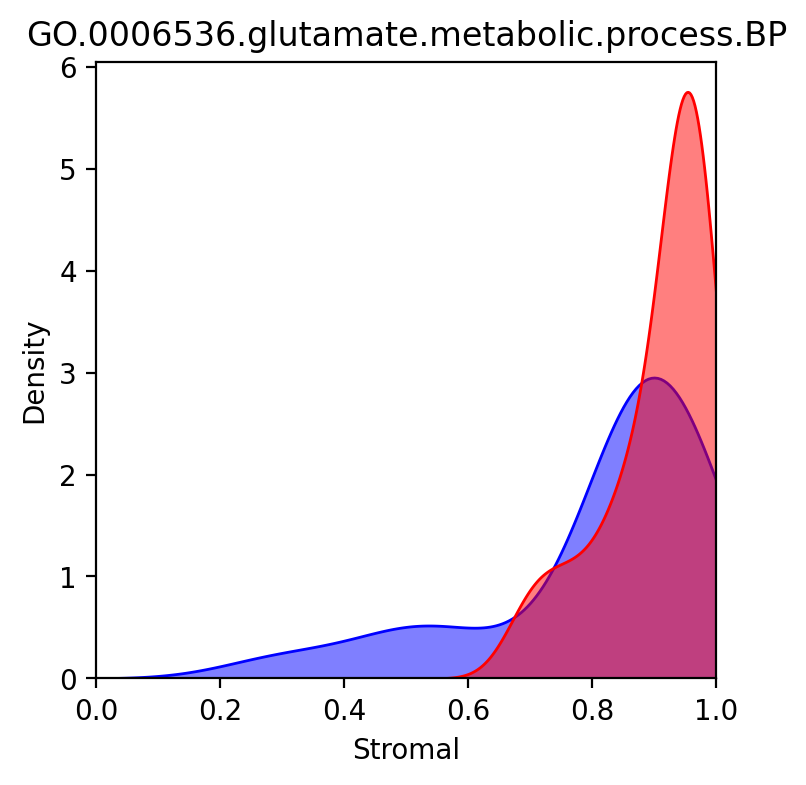

In [499]:
#loading LOO human data below

# Define file paths for the two R2 files
r2_file_path_1 = ".../Atlas/scSPECTRA/multispecies_marker_new_human/Stromal_healthy_r2_results.csv"  
r2_file_path_2 = ".../Atlas/scSPECTRA/multispecies_marker_new_human/Stromal_diseased_r2_results.csv"  

# Load the data from each file
r2_data_group1 = pd.read_csv(r2_file_path_1)
r2_data_group2 = pd.read_csv(r2_file_path_2)

# Choose the gene set of interest
gene_set = "GO.0006536.glutamate.metabolic.process.BP"  # Example gene set

# Filter data for the specified gene set
r2_data_group1_filtered = r2_data_group1[r2_data_group1['GeneSet'] == gene_set]
r2_data_group2_filtered = r2_data_group2[r2_data_group2['GeneSet'] == gene_set]

# Plotting the data from both groups
sns.kdeplot(r2_data_group1_filtered['R2Value'], label="Healthy", shade=True, alpha=0.5, color="blue", clip=(0, 1))
sns.kdeplot(r2_data_group2_filtered['R2Value'], label="Diseased", shade=True, alpha=0.5, color="red", clip=(0, 1))

plt.title(gene_set)
plt.xlabel("Stromal")
plt.ylabel("Density")
plt.xlim(0, 1)  # Adjust limits if needed
#plt.legend()  # Adjust legend position if needed
plt.show()

/tmp/ipykernel_1754847/1820462707.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(r2_data_group1_filtered['R2Value'], label="Healthy", shade=True, alpha=0.5, color="blue", clip=(0, 1))
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1754847/1820462707.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fil

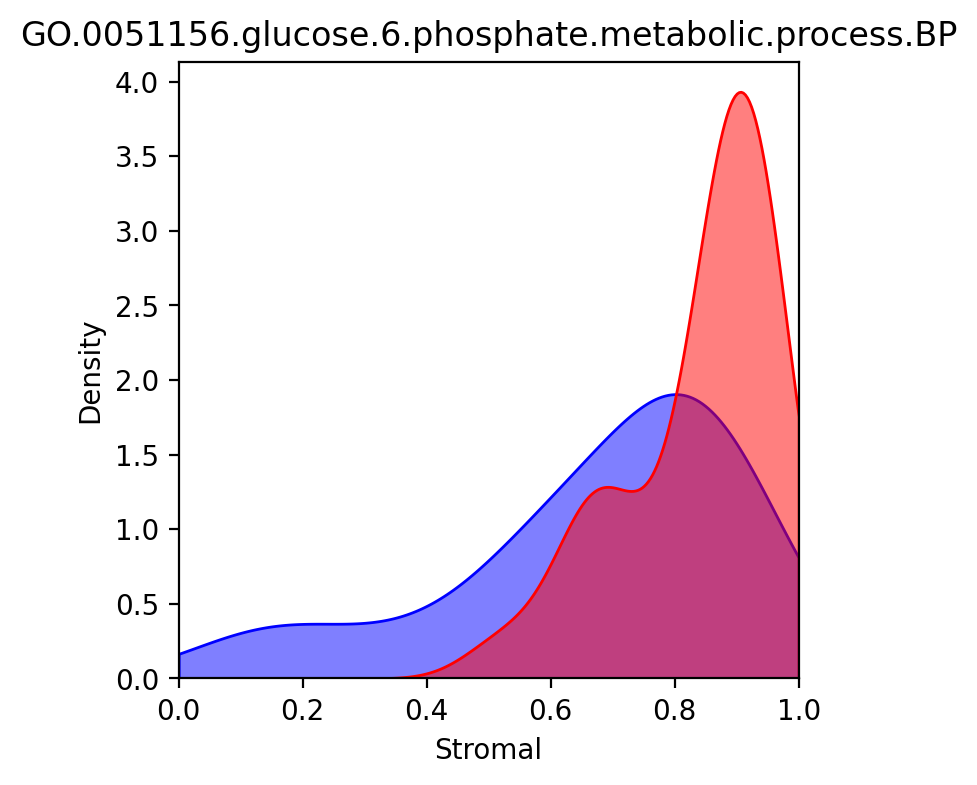

In [500]:
# Define file paths for the two R2 files
r2_file_path_1 = ".../Atlas/scSPECTRA/multispecies_marker_new_human/Stromal_healthy_r2_results.csv"  
r2_file_path_2 = ".../Atlas/scSPECTRA/multispecies_marker_new_human/Stromal_diseased_r2_results.csv"  

# Load the data from each file
r2_data_group1 = pd.read_csv(r2_file_path_1)
r2_data_group2 = pd.read_csv(r2_file_path_2)

# Choose the gene set of interest
gene_set = "GO.0051156.glucose.6.phosphate.metabolic.process.BP"  # Example gene set

# Filter data for the specified gene set
r2_data_group1_filtered = r2_data_group1[r2_data_group1['GeneSet'] == gene_set]
r2_data_group2_filtered = r2_data_group2[r2_data_group2['GeneSet'] == gene_set]

# Plotting the data from both groups
sns.kdeplot(r2_data_group1_filtered['R2Value'], label="Healthy", shade=True, alpha=0.5, color="blue", clip=(0, 1))
sns.kdeplot(r2_data_group2_filtered['R2Value'], label="Diseased", shade=True, alpha=0.5, color="red", clip=(0, 1))

plt.title(gene_set)
plt.xlabel("Stromal")
plt.ylabel("Density")
plt.xlim(0, 1)  # Adjust limits if needed
#plt.legend()  # Adjust legend position if needed
plt.show()

/tmp/ipykernel_1754847/973954087.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(r2_mouse_DKD[gene_set], label="Mouse_DKD", shade=True, alpha=1.0, color="#DC143C", clip=(0, 1), linestyle="")
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1754847/973954087.py:54: FutureWarning: 

`shade` is now deprecated in favor of

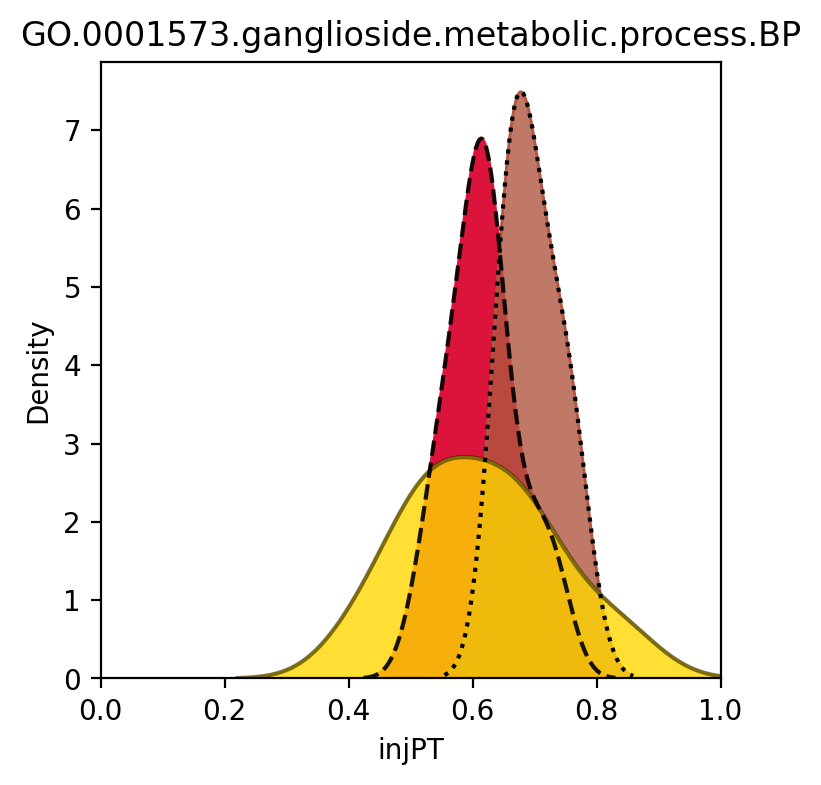

In [592]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the metadata
metadata = pd.read_csv(metadata_path)

# Create a new column by concatenating feature1 and feature2
metadata['model'] = metadata['species'].astype(str) + '_' + metadata['condition_harmonized2'].astype(str) + '_' + metadata['proj'].astype(str)


# Set the cell type and gene set of interest
cell_type = "injPT"  # Example cell type
gene_set = "GO.0001573.ganglioside.metabolic.process.BP"  # Replace with the actual gene set name
#gene_set = "GO.0010893.positive.regulation.of.steroid.biosynthetic.process.BP"  # Replace with the actual gene set name
#gene_set = "GO.0060391.positive.regulation.of.SMAD.protein.signal.transduction.BP"


# Read the R2 file for the specific cell type
r2_file_path = f"{r2_base_path}{cell_type}.csv"
r2_data = pd.read_csv(r2_file_path, index_col=0)


# Subset the R2 data to the gene set of interest
r2_subset = r2_data[[gene_set]]


# Subset the metadata to include only the samples present in the R2 file
metadata_subset = metadata[metadata['orig_ident'].isin(r2_subset.index)]


# Create lists of samples for rat and mouse


mouse_DKD = metadata_subset[metadata_subset['model'] == 'mouse_DKD_m_humphreys_DKD']['orig_ident'].tolist()
mouse_AKI = metadata_subset[metadata_subset['model'] == 'mouse_AKI_m_humphrey_IRI']['orig_ident'].tolist()
rat_H_CKD = metadata_subset[metadata_subset['model'] == 'rat_H-CKD_r_doca']['orig_ident'].tolist()
rat_DKD = metadata_subset[metadata_subset['model'] == 'rat_DKD_r_ZSF']['orig_ident'].tolist()
mouse_FA = ['LYZ2_eYFP', 'GGT_eYFP', 'PDGFR-eYFP', 'FA3']


r2_mouse_DKD = r2_subset.loc[mouse_DKD]
r2_mouse_AKI = r2_subset.loc[mouse_AKI]
r2_rat_H_CKD = r2_subset.loc[rat_H_CKD]

r2_rat_DKD = r2_subset.loc[rat_DKD]

r2_mouse_FA = r2_subset.loc[mouse_FA]


# Plotting with new color scheme
sns.kdeplot(r2_mouse_DKD[gene_set], label="Mouse_DKD", shade=True, alpha=1.0, color="#DC143C", clip=(0, 1), linestyle="")
sns.kdeplot(r2_mouse_DKD[gene_set], label="Mouse_DKD", shade=False, alpha=0.9, color="black", clip=(0, 1), linestyle="--")

sns.kdeplot(r2_mouse_FA[gene_set], label="Mouse_FA", shade=True, alpha=0.8, color="#B15641", clip=(0, 1), linestyle="")
sns.kdeplot(r2_mouse_FA[gene_set], label="Mouse_FA", shade=False, alpha=1.0, color="black", clip=(0, 1), linestyle=":")

sns.kdeplot(r2_mouse_AKI[gene_set], label="Mouse_AKI", shade=True, alpha=0.8, color="#FFD700", clip=(0, 1), linestyle="")
sns.kdeplot(r2_mouse_AKI[gene_set], label="Mouse_AKI", shade=False, alpha=0.5, color="black", clip=(0, 1), linestyle="-")

#sns.kdeplot(r2_rat_DKD[gene_set], label="Rat_ZSF1", shade=True, alpha=1.0, color="#1C775E", clip=(0, 1), linestyle="--")
#sns.kdeplot(r2_rat_DKD[gene_set], label="Rat_ZSF1", shade=False, alpha=1.0, color="black", clip=(0, 1), linestyle="--")


#sns.kdeplot(r2_rat_H_CKD[gene_set], label="Rat_DOCA", shade=True, alpha=0.7, color="#98FB98", clip=(0, 1))
#sns.kdeplot(r2_rat_H_CKD[gene_set], label="Rat_DOCA", shade=False, alpha=1.0, color="black", clip=(0, 1))
#sns.kdeplot(r2_mouse_Control[gene_set], label="Mouse_Control", shade=True, alpha=0.5, color="yellow", linestyle="--", clip=(0, 1))
#sns.kdeplot(r2_rat_Control[gene_set], label="Rat_Control", shade=True, alpha=0.5, color="green", linestyle="--", clip=(0, 1))


plt.title(gene_set)
plt.xlabel(cell_type)
plt.ylabel("Density")

# Move the legend to the right of the plot
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(0, 1)  # Set x-axis limit from 0 to 1
plt.show()

/tmp/ipykernel_1754847/4084630892.py:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(r2_rat_DKD[gene_set], label="Rat_ZSF1", shade=True, alpha=1.0, color="#1C775E", clip=(0, 1), linestyle="--")
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1754847/4084630892.py:50: FutureWarning: 

`shade` is now deprecated in favor o

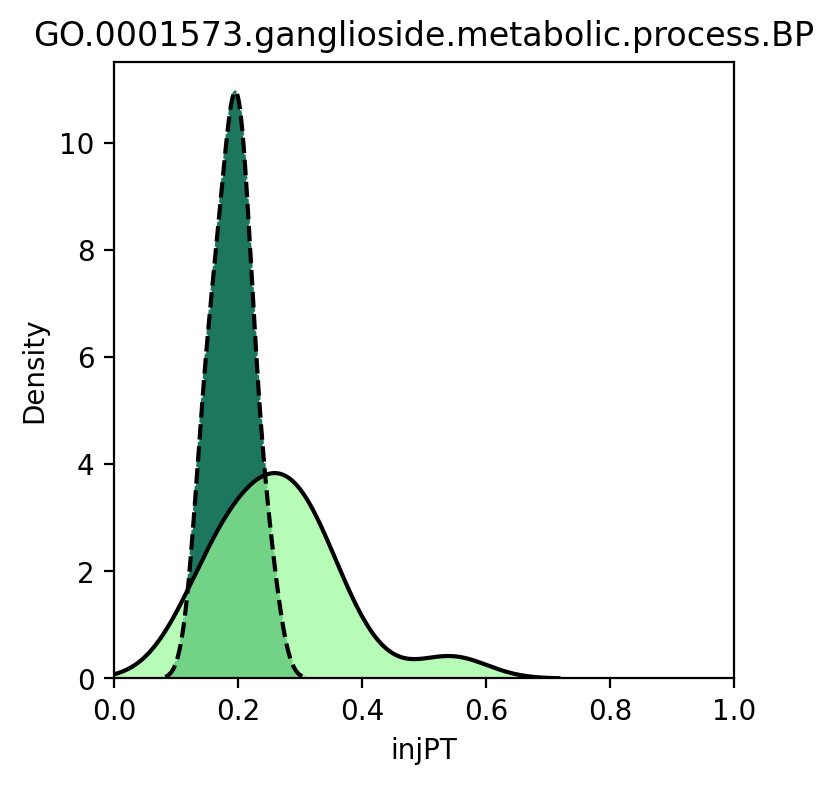

In [593]:
# Load the metadata
metadata = pd.read_csv(metadata_path)

# Create a new column by concatenating feature1 and feature2
metadata['model'] = metadata['species'].astype(str) + '_' + metadata['condition_harmonized2'].astype(str) + '_' + metadata['proj'].astype(str)


# Set the cell type and gene set of interest
cell_type = "injPT"  # Example cell type
gene_set = "GO.0001573.ganglioside.metabolic.process.BP"  # Replace with the actual gene set name
#gene_set = "GO.0010893.positive.regulation.of.steroid.biosynthetic.process.BP"  # Replace with the actual gene set name
#gene_set = "GO.0060391.positive.regulation.of.SMAD.protein.signal.transduction.BP"


# Read the R2 file for the specific cell type
r2_file_path = f"{r2_base_path}{cell_type}.csv"
r2_data = pd.read_csv(r2_file_path, index_col=0)


# Subset the R2 data to the gene set of interest
r2_subset = r2_data[[gene_set]]


# Subset the metadata to include only the samples present in the R2 file
metadata_subset = metadata[metadata['orig_ident'].isin(r2_subset.index)]


# Create lists of samples for rat and mouse


mouse_DKD = metadata_subset[metadata_subset['model'] == 'mouse_DKD_m_humphreys_DKD']['orig_ident'].tolist()
mouse_AKI = metadata_subset[metadata_subset['model'] == 'mouse_AKI_m_humphrey_IRI']['orig_ident'].tolist()
rat_H_CKD = metadata_subset[metadata_subset['model'] == 'rat_H-CKD_r_doca']['orig_ident'].tolist()
rat_DKD = metadata_subset[metadata_subset['model'] == 'rat_DKD_r_ZSF']['orig_ident'].tolist()
mouse_FA = ['LYZ2_eYFP', 'GGT_eYFP', 'PDGFR-eYFP', 'FA3']


r2_mouse_DKD = r2_subset.loc[mouse_DKD]
r2_mouse_AKI = r2_subset.loc[mouse_AKI]
r2_rat_H_CKD = r2_subset.loc[rat_H_CKD]
r2_rat_DKD = r2_subset.loc[rat_DKD]
r2_mouse_FA = r2_subset.loc[mouse_FA]


# Plotting with new color scheme
#sns.kdeplot(r2_mouse_DKD[gene_set], label="Mouse_DKD", shade=True, alpha=0.7, color="#F08080", clip=(0, 1))

#sns.kdeplot(r2_mouse_AKI[gene_set], label="Mouse_AKI", shade=True, alpha=0.5, color="#F4A460", clip=(0, 1))
sns.kdeplot(r2_rat_DKD[gene_set], label="Rat_ZSF1", shade=True, alpha=1.0, color="#1C775E", clip=(0, 1), linestyle="--")
sns.kdeplot(r2_rat_DKD[gene_set], label="Rat_ZSF1", shade=False, alpha=1.0, color="black", clip=(0, 1), linestyle="--")


sns.kdeplot(r2_rat_H_CKD[gene_set], label="Rat_DOCA", shade=True, alpha=0.7, color="#98FB98", clip=(0, 1))
sns.kdeplot(r2_rat_H_CKD[gene_set], label="Rat_DOCA", shade=False, alpha=1.0, color="black", clip=(0, 1))
#sns.kdeplot(r2_mouse_Control[gene_set], label="Mouse_Control", shade=True, alpha=0.5, color="yellow", linestyle="--", clip=(0, 1))
#sns.kdeplot(r2_rat_Control[gene_set], label="Rat_Control", shade=True, alpha=0.5, color="green", linestyle="--", clip=(0, 1))
#sns.kdeplot(r2_mouse_FA[gene_set], label="Mouse_FA", shade=True, alpha=0.5, color="#DAA520", clip=(0, 1))


plt.title(gene_set)
plt.xlabel(cell_type)
plt.ylabel("Density")

# Move the legend to the right of the plot
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(0, 1)  # Set x-axis limit from 0 to 1
plt.show()

In [341]:
metadata['proj'].value_counts()

proj
m_humphreys_DKD    31
h_KPMP             29
m_humphrey_IRI     24
r_doca             22
h_Susztak          17
r_ZSF              12
mouse_susztak       6
Name: count, dtype: int64

In [ ]:
["GO.0032421.stereocilium.bundle.CC",
                      'GO.0098856.intestinal.lipid.absorption.BP', "GO.0072311.glomerular.epithelial.cell.differentiation.BP",
                      "GO.0097468.programmed.cell.death.in.response.to.reactive.oxygen.species.BP", "GO.0050746.regulation.of.lipoprotein.metabolic.process.BP",
    "GO.0010893.positive.regulation.of.steroid.biosynthetic.process.BP", "GO.0060391.positive.regulation.of.SMAD.protein.signal.transduction.BP", 
                      "GO.0045880.positive.regulation.of.smoothened.signaling.pathway.BP",

/tmp/ipykernel_1754847/1221719640.py:55: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(r2_mouse_DKD[gene_set], label="Mouse_DKD", shade=True, alpha=1.0, color="#DC143C", clip=(0, 1), linestyle="")
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gpfs/o_kloetzer/miniforge3/envs/scvi-pip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_1754847/1221719640.py:56: FutureWarning: 

`shade` is now deprecated in favor 

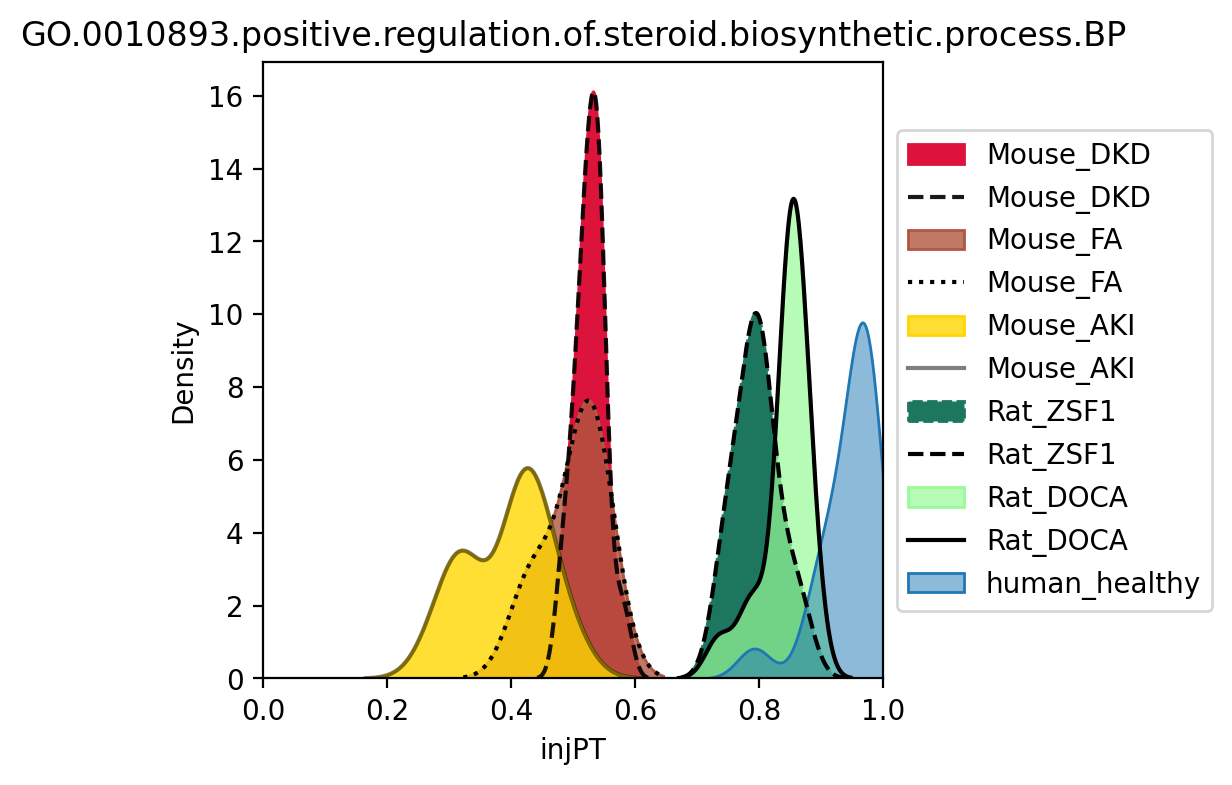

In [563]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the metadata
metadata = pd.read_csv(metadata_path)

r2_base_path = ".../Atlas/scSPECTRA/onthefly/rodents_on_human_disease/V4/R2/R2_"


# Create a new column by concatenating feature1 and feature2
metadata['model'] = metadata['species'].astype(str) + '_' + metadata['condition_harmonized2'].astype(str) + '_' + metadata['proj'].astype(str)


# Set the cell type and gene set of interest
cell_type = "injPT"  # Example cell type
#gene_set = "GO.0001573.ganglioside.metabolic.process.BP"  # Replace with the actual gene set name
#gene_set = "GO.0010893.positive.regulation.of.steroid.biosynthetic.process.BP"  # Replace with the actual gene set name
gene_set = "GO.0010893.positive.regulation.of.steroid.biosynthetic.process.BP"


# Read the R2 file for the specific cell type
r2_file_path = f"{r2_base_path}{cell_type}.csv"
r2_data = pd.read_csv(r2_file_path, index_col=0)


# Subset the R2 data to the gene set of interest
r2_subset = r2_data[[gene_set]]


# Subset the metadata to include only the samples present in the R2 file
metadata_subset = metadata[metadata['orig_ident'].isin(r2_subset.index)]


# Create lists of samples for rat and mouse


mouse_DKD = metadata_subset[metadata_subset['model'] == 'mouse_DKD_m_humphreys_DKD']['orig_ident'].tolist()
mouse_AKI = metadata_subset[metadata_subset['model'] == 'mouse_AKI_m_humphrey_IRI']['orig_ident'].tolist()
rat_H_CKD = metadata_subset[metadata_subset['model'] == 'rat_H-CKD_r_doca']['orig_ident'].tolist()
rat_DKD = metadata_subset[metadata_subset['model'] == 'rat_DKD_r_ZSF']['orig_ident'].tolist()
mouse_FA = ['LYZ2_eYFP', 'GGT_eYFP', 'PDGFR-eYFP', 'FA3']


r2_mouse_DKD = r2_subset.loc[mouse_DKD]
r2_mouse_AKI = r2_subset.loc[mouse_AKI]
r2_rat_H_CKD = r2_subset.loc[rat_H_CKD]

r2_rat_DKD = r2_subset.loc[rat_DKD]

r2_mouse_FA = r2_subset.loc[mouse_FA]


# Plotting with new color scheme
sns.kdeplot(r2_mouse_DKD[gene_set], label="Mouse_DKD", shade=True, alpha=1.0, color="#DC143C", clip=(0, 1), linestyle="")
sns.kdeplot(r2_mouse_DKD[gene_set], label="Mouse_DKD", shade=False, alpha=0.9, color="black", clip=(0, 1), linestyle="--")

sns.kdeplot(r2_mouse_FA[gene_set], label="Mouse_FA", shade=True, alpha=0.8, color="#B15641", clip=(0, 1), linestyle="")
sns.kdeplot(r2_mouse_FA[gene_set], label="Mouse_FA", shade=False, alpha=1.0, color="black", clip=(0, 1), linestyle=":")

sns.kdeplot(r2_mouse_AKI[gene_set], label="Mouse_AKI", shade=True, alpha=0.8, color="#FFD700", clip=(0, 1), linestyle="")
sns.kdeplot(r2_mouse_AKI[gene_set], label="Mouse_AKI", shade=False, alpha=0.5, color="black", clip=(0, 1), linestyle="-")

sns.kdeplot(r2_rat_DKD[gene_set], label="Rat_ZSF1", shade=True, alpha=1.0, color="#1C775E", clip=(0, 1), linestyle="--")
sns.kdeplot(r2_rat_DKD[gene_set], label="Rat_ZSF1", shade=False, alpha=1.0, color="black", clip=(0, 1), linestyle="--")


sns.kdeplot(r2_rat_H_CKD[gene_set], label="Rat_DOCA", shade=True, alpha=0.7, color="#98FB98", clip=(0, 1))
sns.kdeplot(r2_rat_H_CKD[gene_set], label="Rat_DOCA", shade=False, alpha=1.0, color="black", clip=(0, 1))

human_healthy = metadata_subset[(metadata_subset['species'] == 'human') & (metadata_subset['disease'] == 'healthy')]['orig_ident'].tolist()
r2_human_healthy = r2_subset.loc[human_healthy]
sns.kdeplot(r2_human_healthy[gene_set], label="human_healthy", shade=True, alpha=0.5, color="#1f77b4", clip=(0, 1))
#sns.kdeplot(r2_human_healthy[gene_set], label="", shade=False, alpha=1.0, color="black", clip=(0, 1), linestyle="--")

#sns.kdeplot(r2_mouse_Control[gene_set], label="Mouse_Control", shade=True, alpha=0.5, color="yellow", linestyle="--", clip=(0, 1))
#sns.kdeplot(r2_rat_Control[gene_set], label="Rat_Control", shade=True, alpha=0.5, color="green", linestyle="--", clip=(0, 1))


plt.title(gene_set)
plt.xlabel(cell_type)
plt.ylabel("Density")

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(0, 1)  # Set x-axis limit from 0 to 1
plt.show()

/tmp/ipykernel_2993334/3753814850.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_subset.loc[metadata_subset['orig_ident'].isin(sample_list), 'model'] = model_name
/tmp/ipykernel_2993334/3753814850.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mouse_DKD' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  metadata_subset.loc[metadata_subset['orig_ident'].isin(sample_list), 'model'] = model_name
/tmp/ipykernel_2993334/3753814850.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

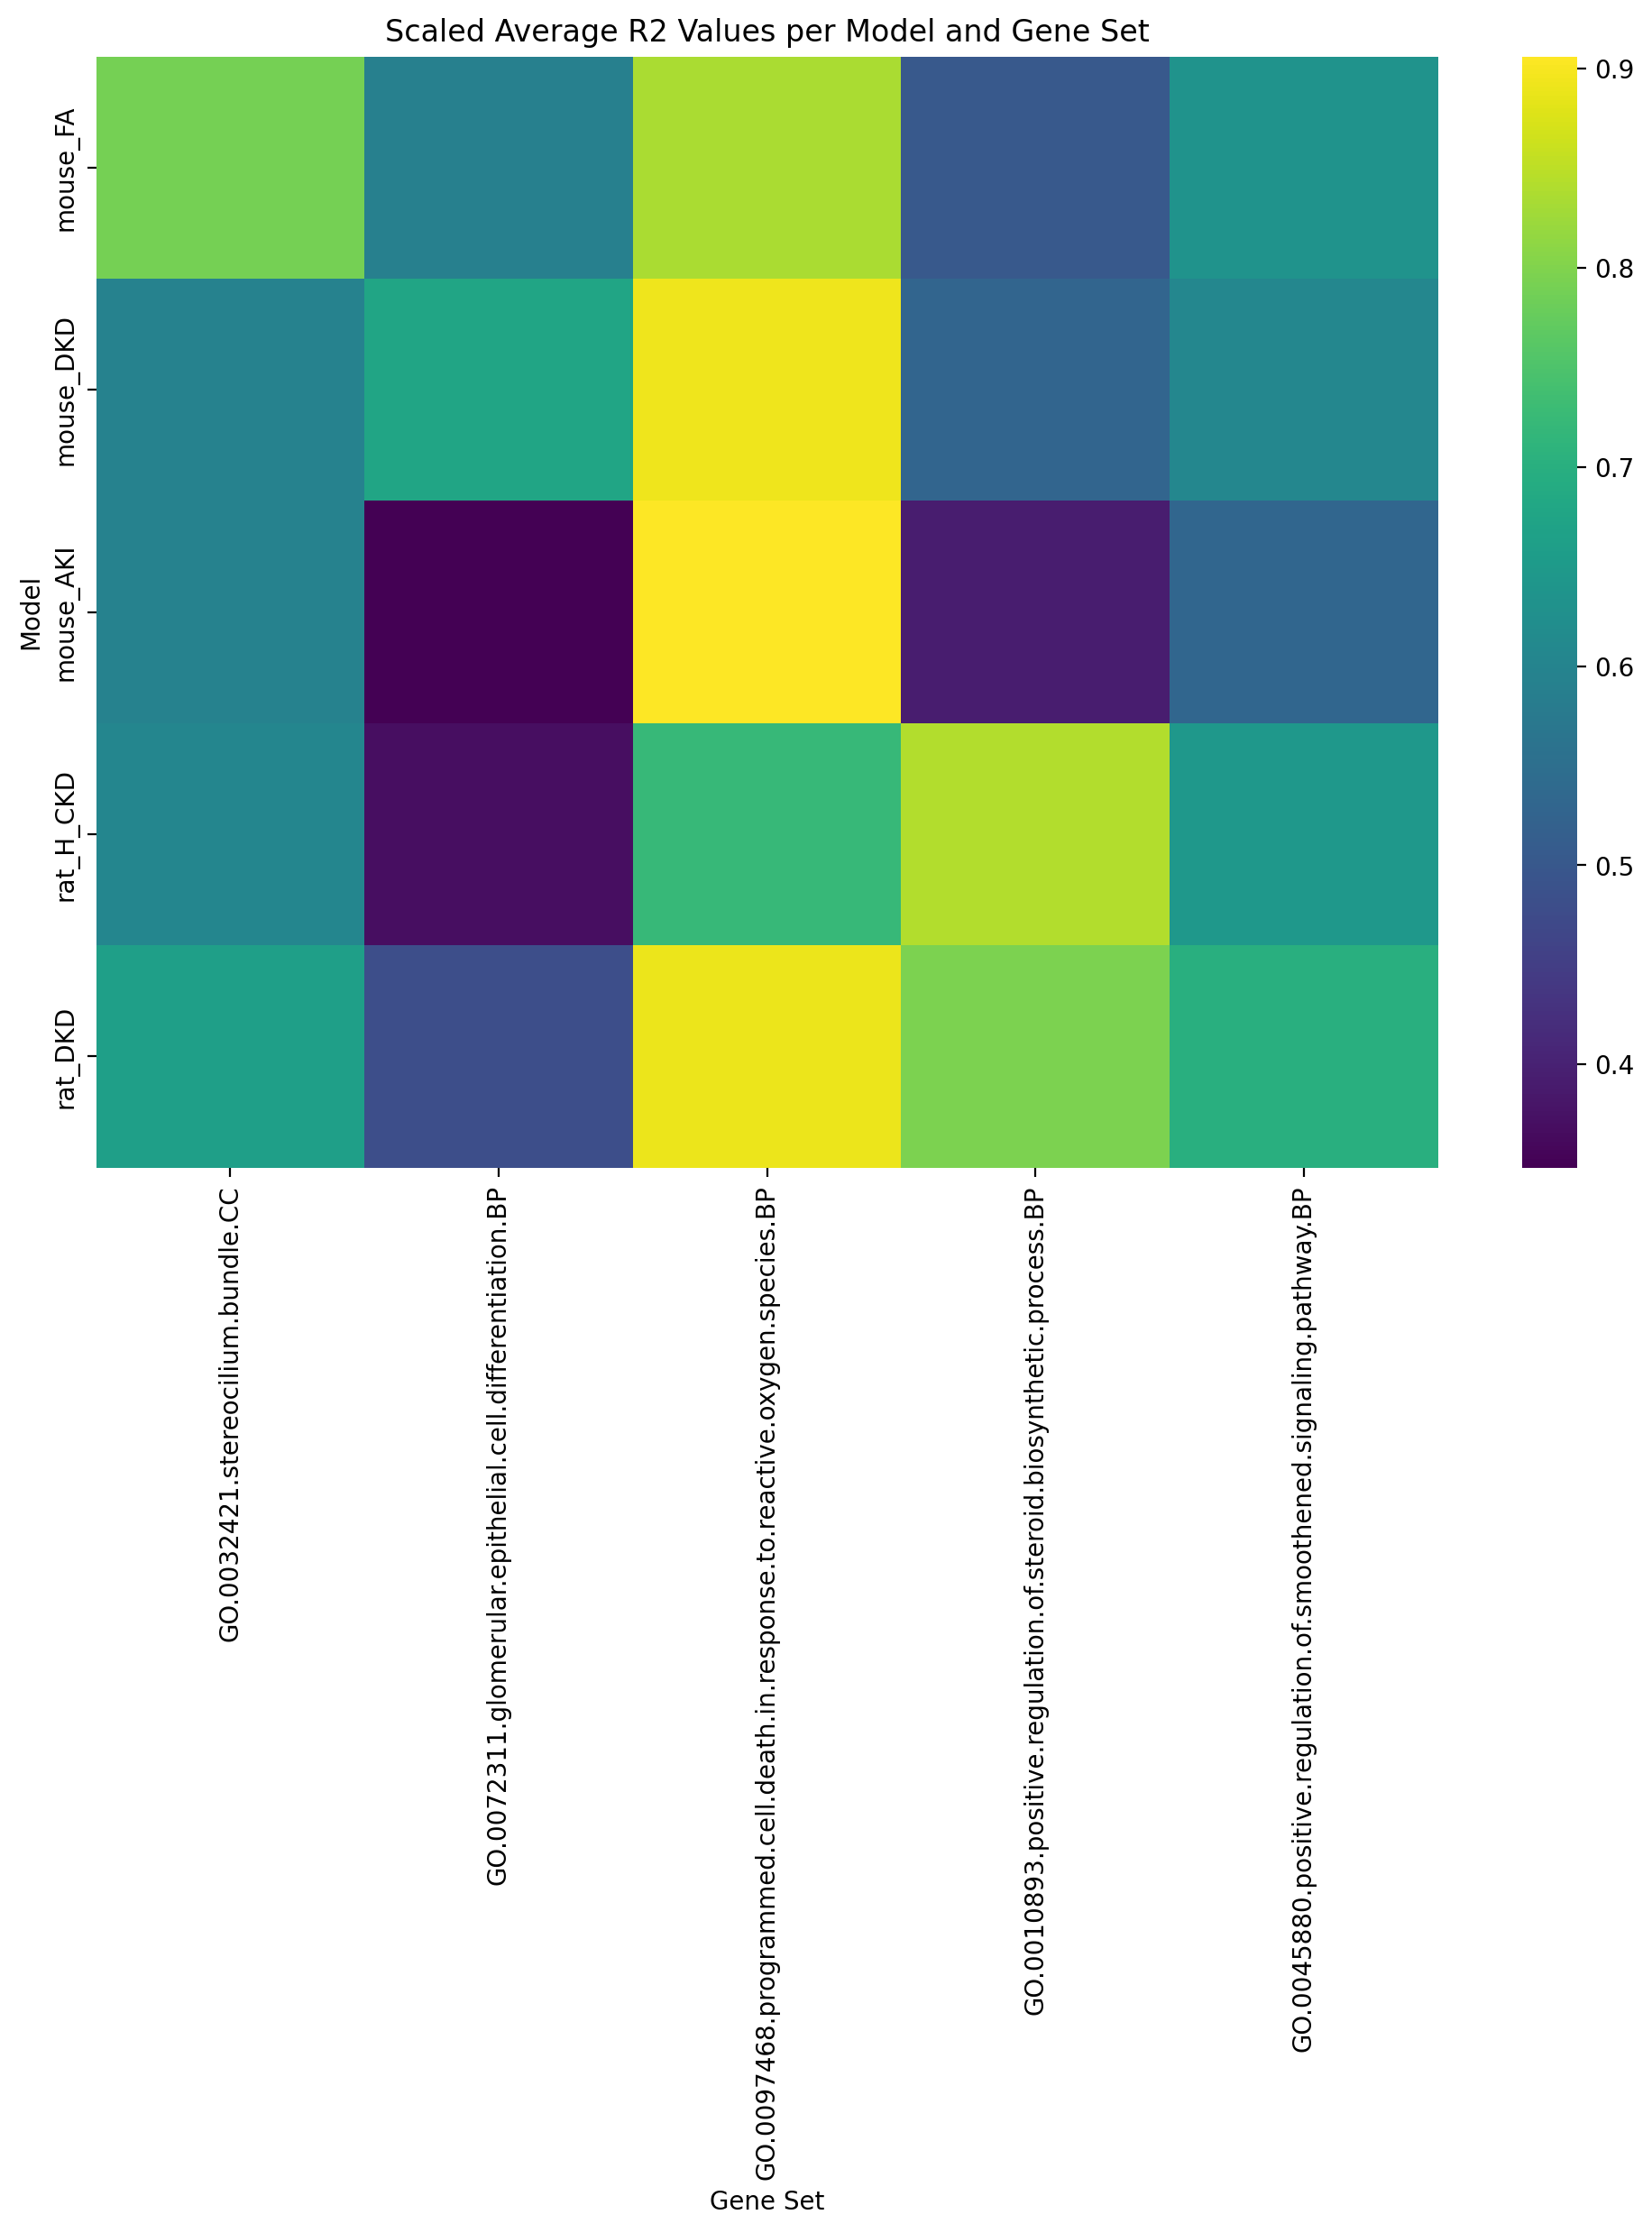

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

cell_type = "injPT"

samples_in_reference = metadata[(metadata['species'] == 'human') & 
                               (metadata['disease'] == 'diseased')]['orig_ident'].tolist()



# Read the R2 file for the specific cell type
r2_file_path = f"{r2_base_path}{cell_type}.csv"
r2_data = pd.read_csv(r2_file_path, index_col=0)
r2_data = r2_data[~r2_data.index.isin(samples_in_reference)]

# Subset the metadata to include only the samples present in the R2 file
metadata_subset = metadata[metadata['orig_ident'].isin(r2_data.index)]

# Step 0: Define Sample Lists
mouse_DKD = metadata_subset[(metadata_subset['proj'] == 'm_humphreys_DKD') &
                           (metadata_subset['disease'] == 'diseased')]['orig_ident'].tolist()
mouse_AKI = metadata_subset[(metadata_subset['proj'] == 'm_humphrey_IRI') &
                           (metadata_subset['disease'] == 'diseased')]['orig_ident'].tolist()
rat_H_CKD = metadata_subset[(metadata_subset['proj'] == 'r_doca') &
                           (metadata_subset['disease'] == 'diseased')]['orig_ident'].tolist()
rat_DKD = metadata_subset[(metadata_subset['proj'] == 'r_ZSF') &
                           (metadata_subset['disease'] == 'diseased')]['orig_ident'].tolist()
mouse_FA = ['LYZ2_eYFP', 'GGT_eYFP', 'PDGFR-eYFP', 'FA3']

mouse_healthy = metadata_subset[(metadata_subset['species'] == 'mouse') &
                           (metadata_subset['disease'] == 'healthy')]['orig_ident'].tolist()
rat_healthy = metadata_subset[(metadata_subset['species'] == 'rat') &
                           (metadata_subset['disease'] == 'healthy')]['orig_ident'].tolist()

human_healthy = metadata_subset[(metadata_subset['species'] == 'human') &
                           (metadata_subset['disease'] == 'healthy')]['orig_ident'].tolist()

# Create a dictionary to map list names to the corresponding model names
list_to_model_mapping = {
    'mouse_DKD': mouse_DKD,
    'mouse_AKI': mouse_AKI,
    'rat_H_CKD': rat_H_CKD,
    'rat_DKD': rat_DKD,
    'mouse_FA': mouse_FA, 


}

category_order = [
    'mouse_FA', 'mouse_DKD', 'mouse_AKI', 'rat_H_CKD', 'rat_DKD',  
    
]

# Step 1: Filter and Categorize Samples in Metadata


for model_name, sample_list in list_to_model_mapping.items():
    metadata_subset.loc[metadata_subset['orig_ident'].isin(sample_list), 'model'] = model_name
    
# Convert 'model' column to an ordered categorical type
metadata_subset['model'] = pd.Categorical(metadata_subset['model'], categories=category_order, ordered=True)


selected_gene_sets = ["GO.0032421.stereocilium.bundle.CC",
                      "GO.0072311.glomerular.epithelial.cell.differentiation.BP",
                      "GO.0097468.programmed.cell.death.in.response.to.reactive.oxygen.species.BP", 
    "GO.0010893.positive.regulation.of.steroid.biosynthetic.process.BP",  
                      "GO.0045880.positive.regulation.of.smoothened.signaling.pathway.BP",
                  

   
                     ] 

# Calculate the average R2 value for each model and gene set
r2_data_filtered = r2_data[selected_gene_sets]
avg_r2 = r2_data_filtered.join(metadata_subset.set_index('orig_ident')['model'])
avg_r2 = avg_r2.groupby('model').mean().reset_index()

# Step 3: Data Visualization
scaler = MinMaxScaler()
scaled_r2_values = avg_r2.drop('model', axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(scaled_r2_values, annot=False, cmap='viridis', 
            yticklabels=avg_r2['model'], xticklabels=selected_gene_sets)
plt.title('Scaled Average R2 Values per Model and Gene Set')
plt.ylabel('Model')
plt.xlabel('Gene Set')
plt.show()

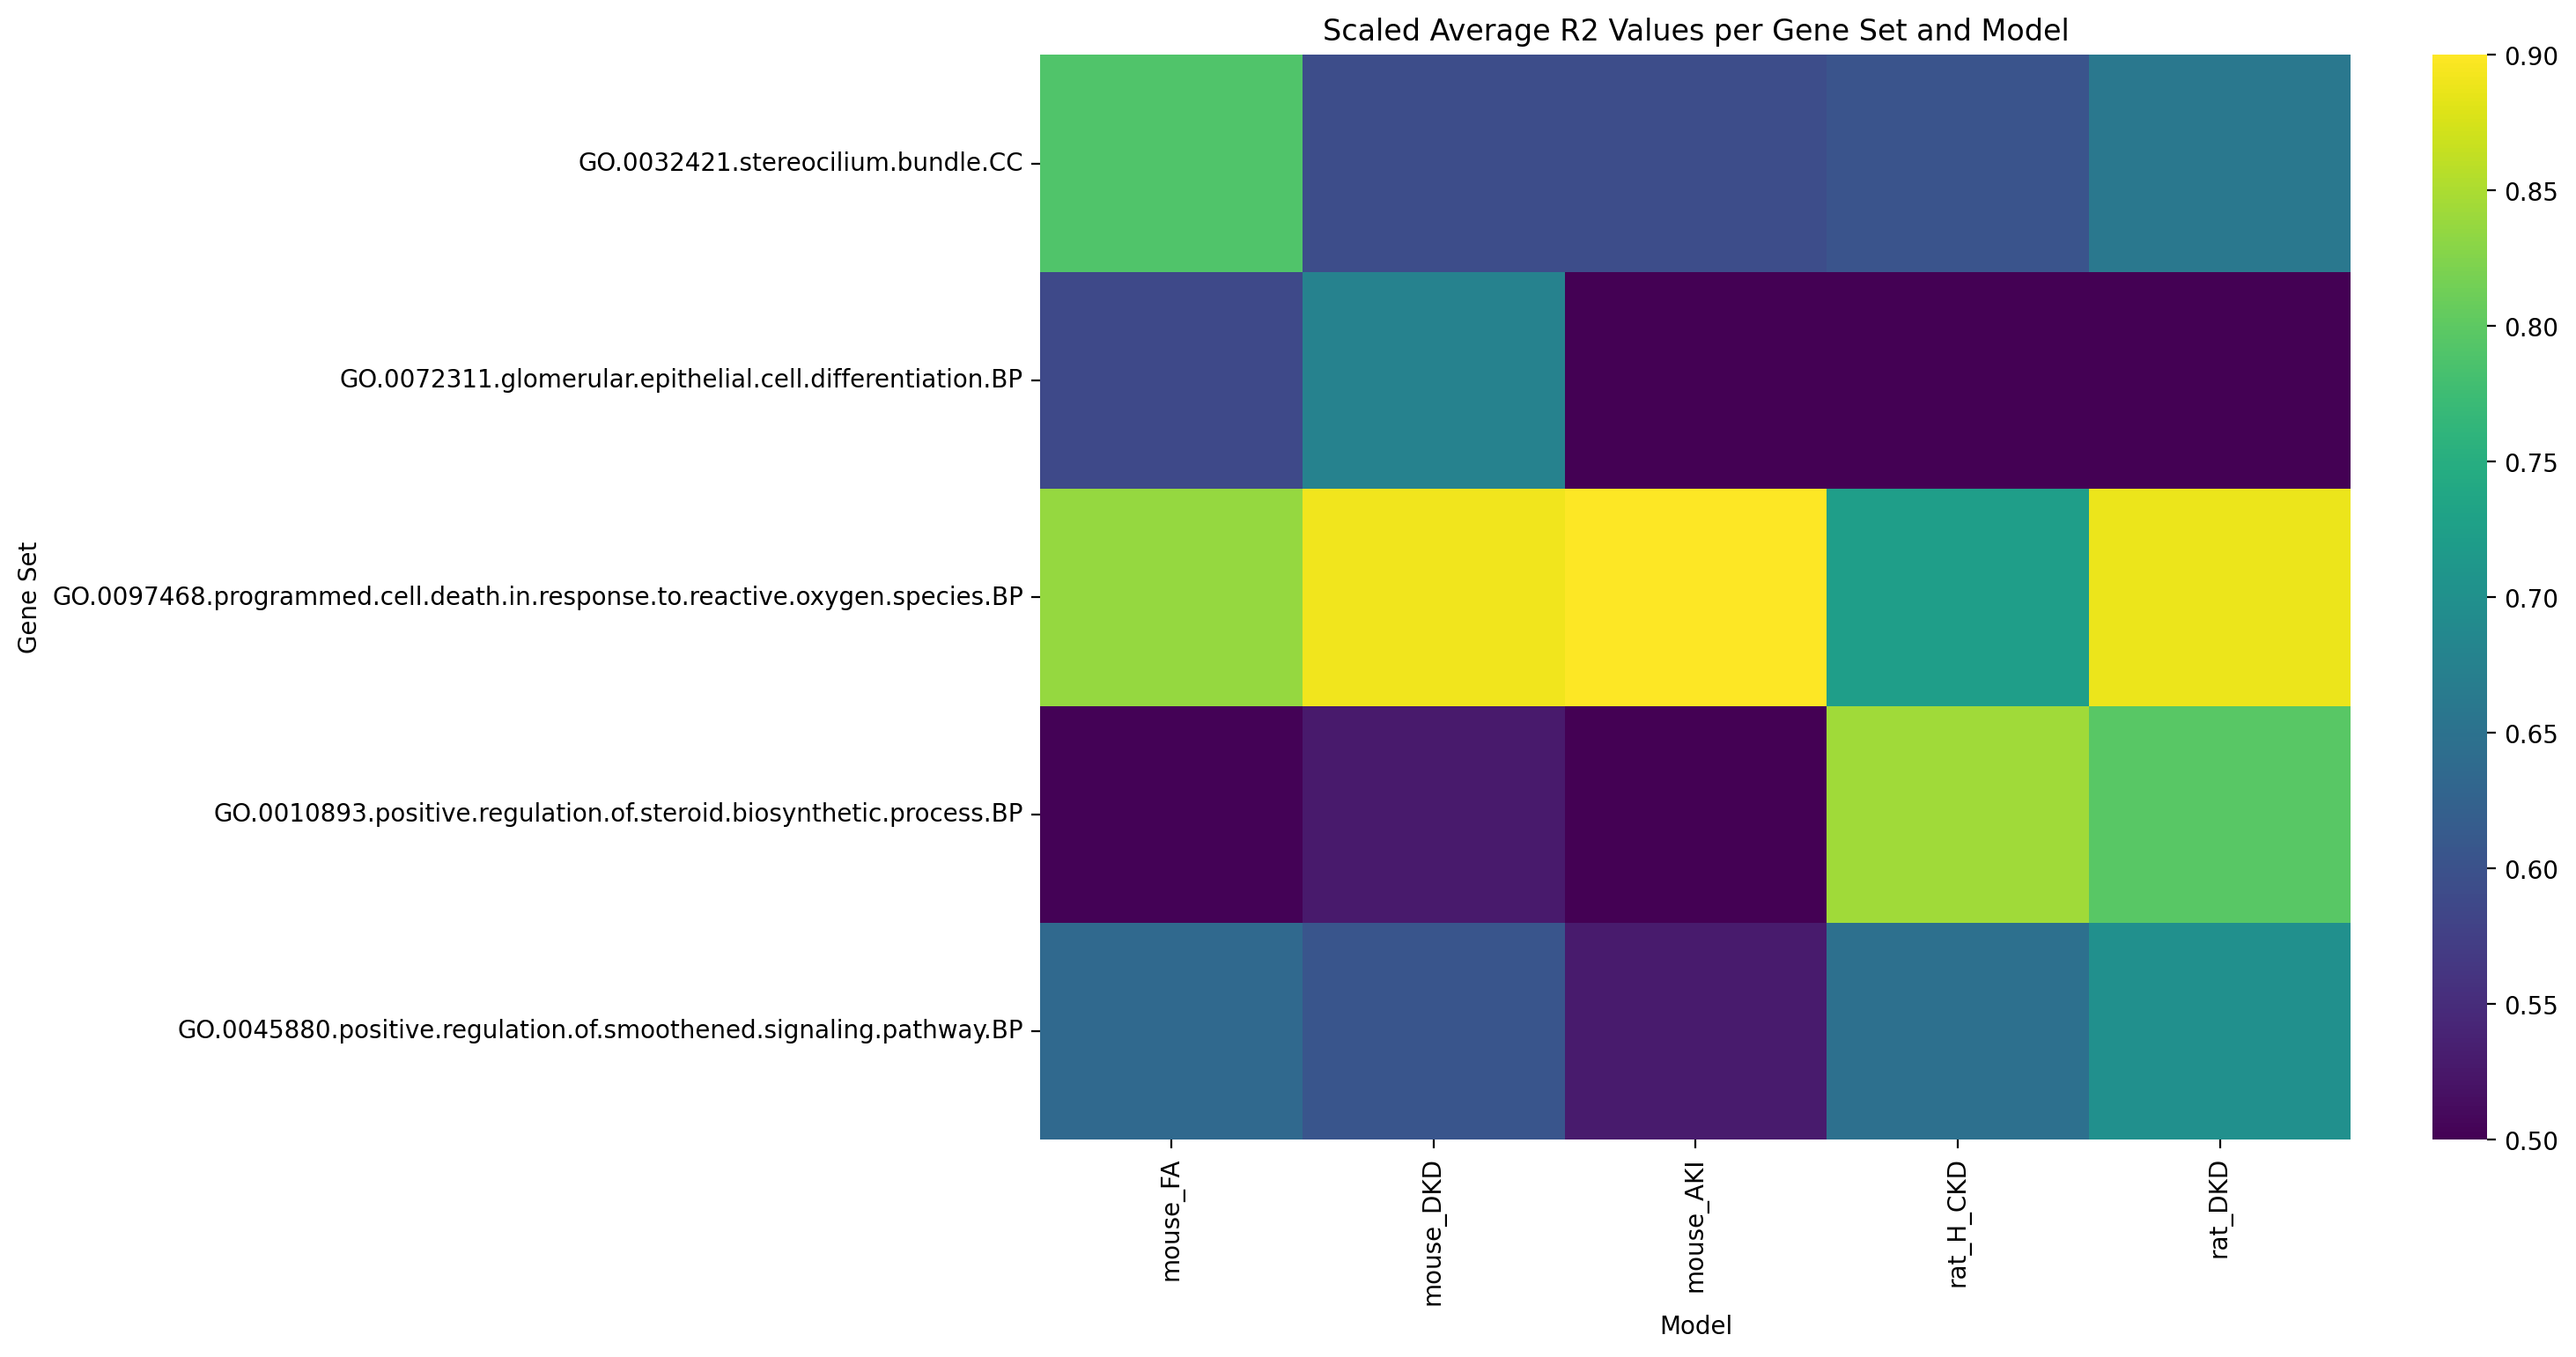

In [28]:
# Transpose the data for the heatmap
scaled_r2_values_transposed = scaled_r2_values.T

plt.figure(figsize=(12, 8))
# Adjust heatmap to display models on x-axis and gene sets on y-axis
sns.heatmap(scaled_r2_values_transposed, annot=False, cmap='viridis',
            yticklabels=selected_gene_sets, xticklabels=avg_r2['model'],
           vmin = 0.5, vmax = 0.9)
plt.title('Scaled Average R2 Values per Gene Set and Model')
plt.ylabel('Gene Set')

plt.xlabel('Model')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

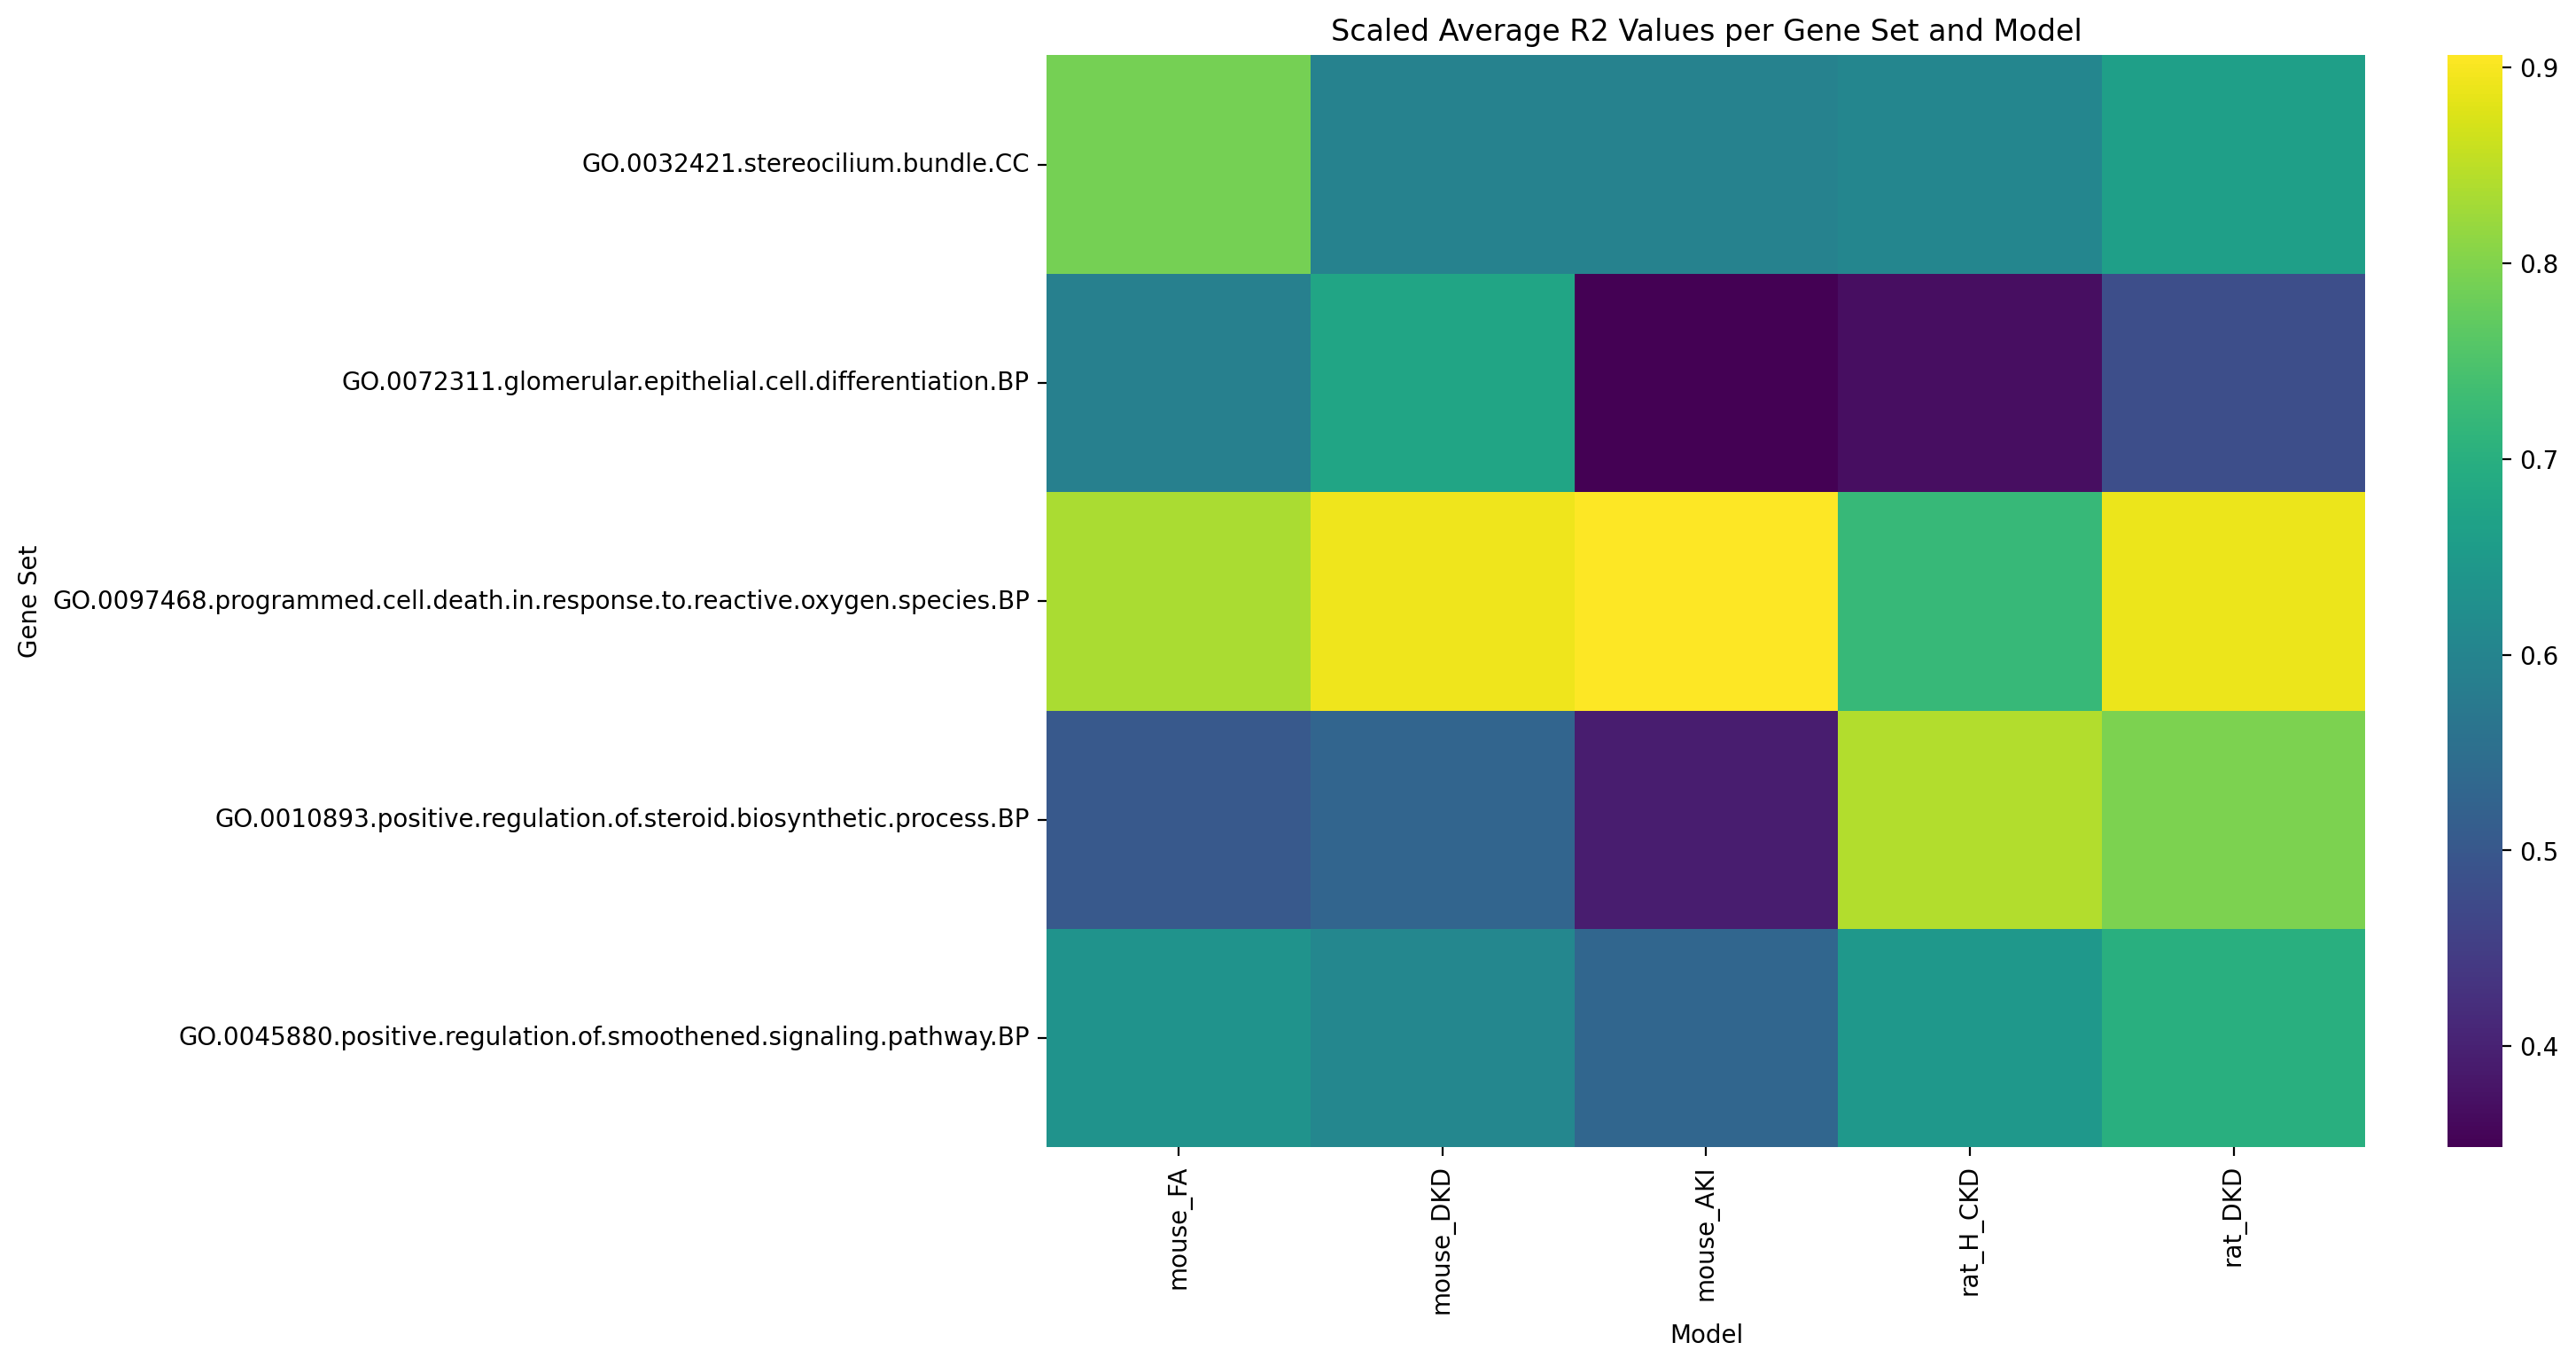

In [27]:
# Transpose the data for the heatmap
scaled_r2_values_transposed = scaled_r2_values.T

plt.figure(figsize=(12, 8))
# Adjust heatmap to display models on x-axis and gene sets on y-axis
sns.heatmap(scaled_r2_values_transposed, annot=False, cmap='viridis',
            yticklabels=selected_gene_sets, xticklabels=avg_r2['model'])
plt.title('Scaled Average R2 Values per Gene Set and Model')
plt.ylabel('Gene Set')

plt.xlabel('Model')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

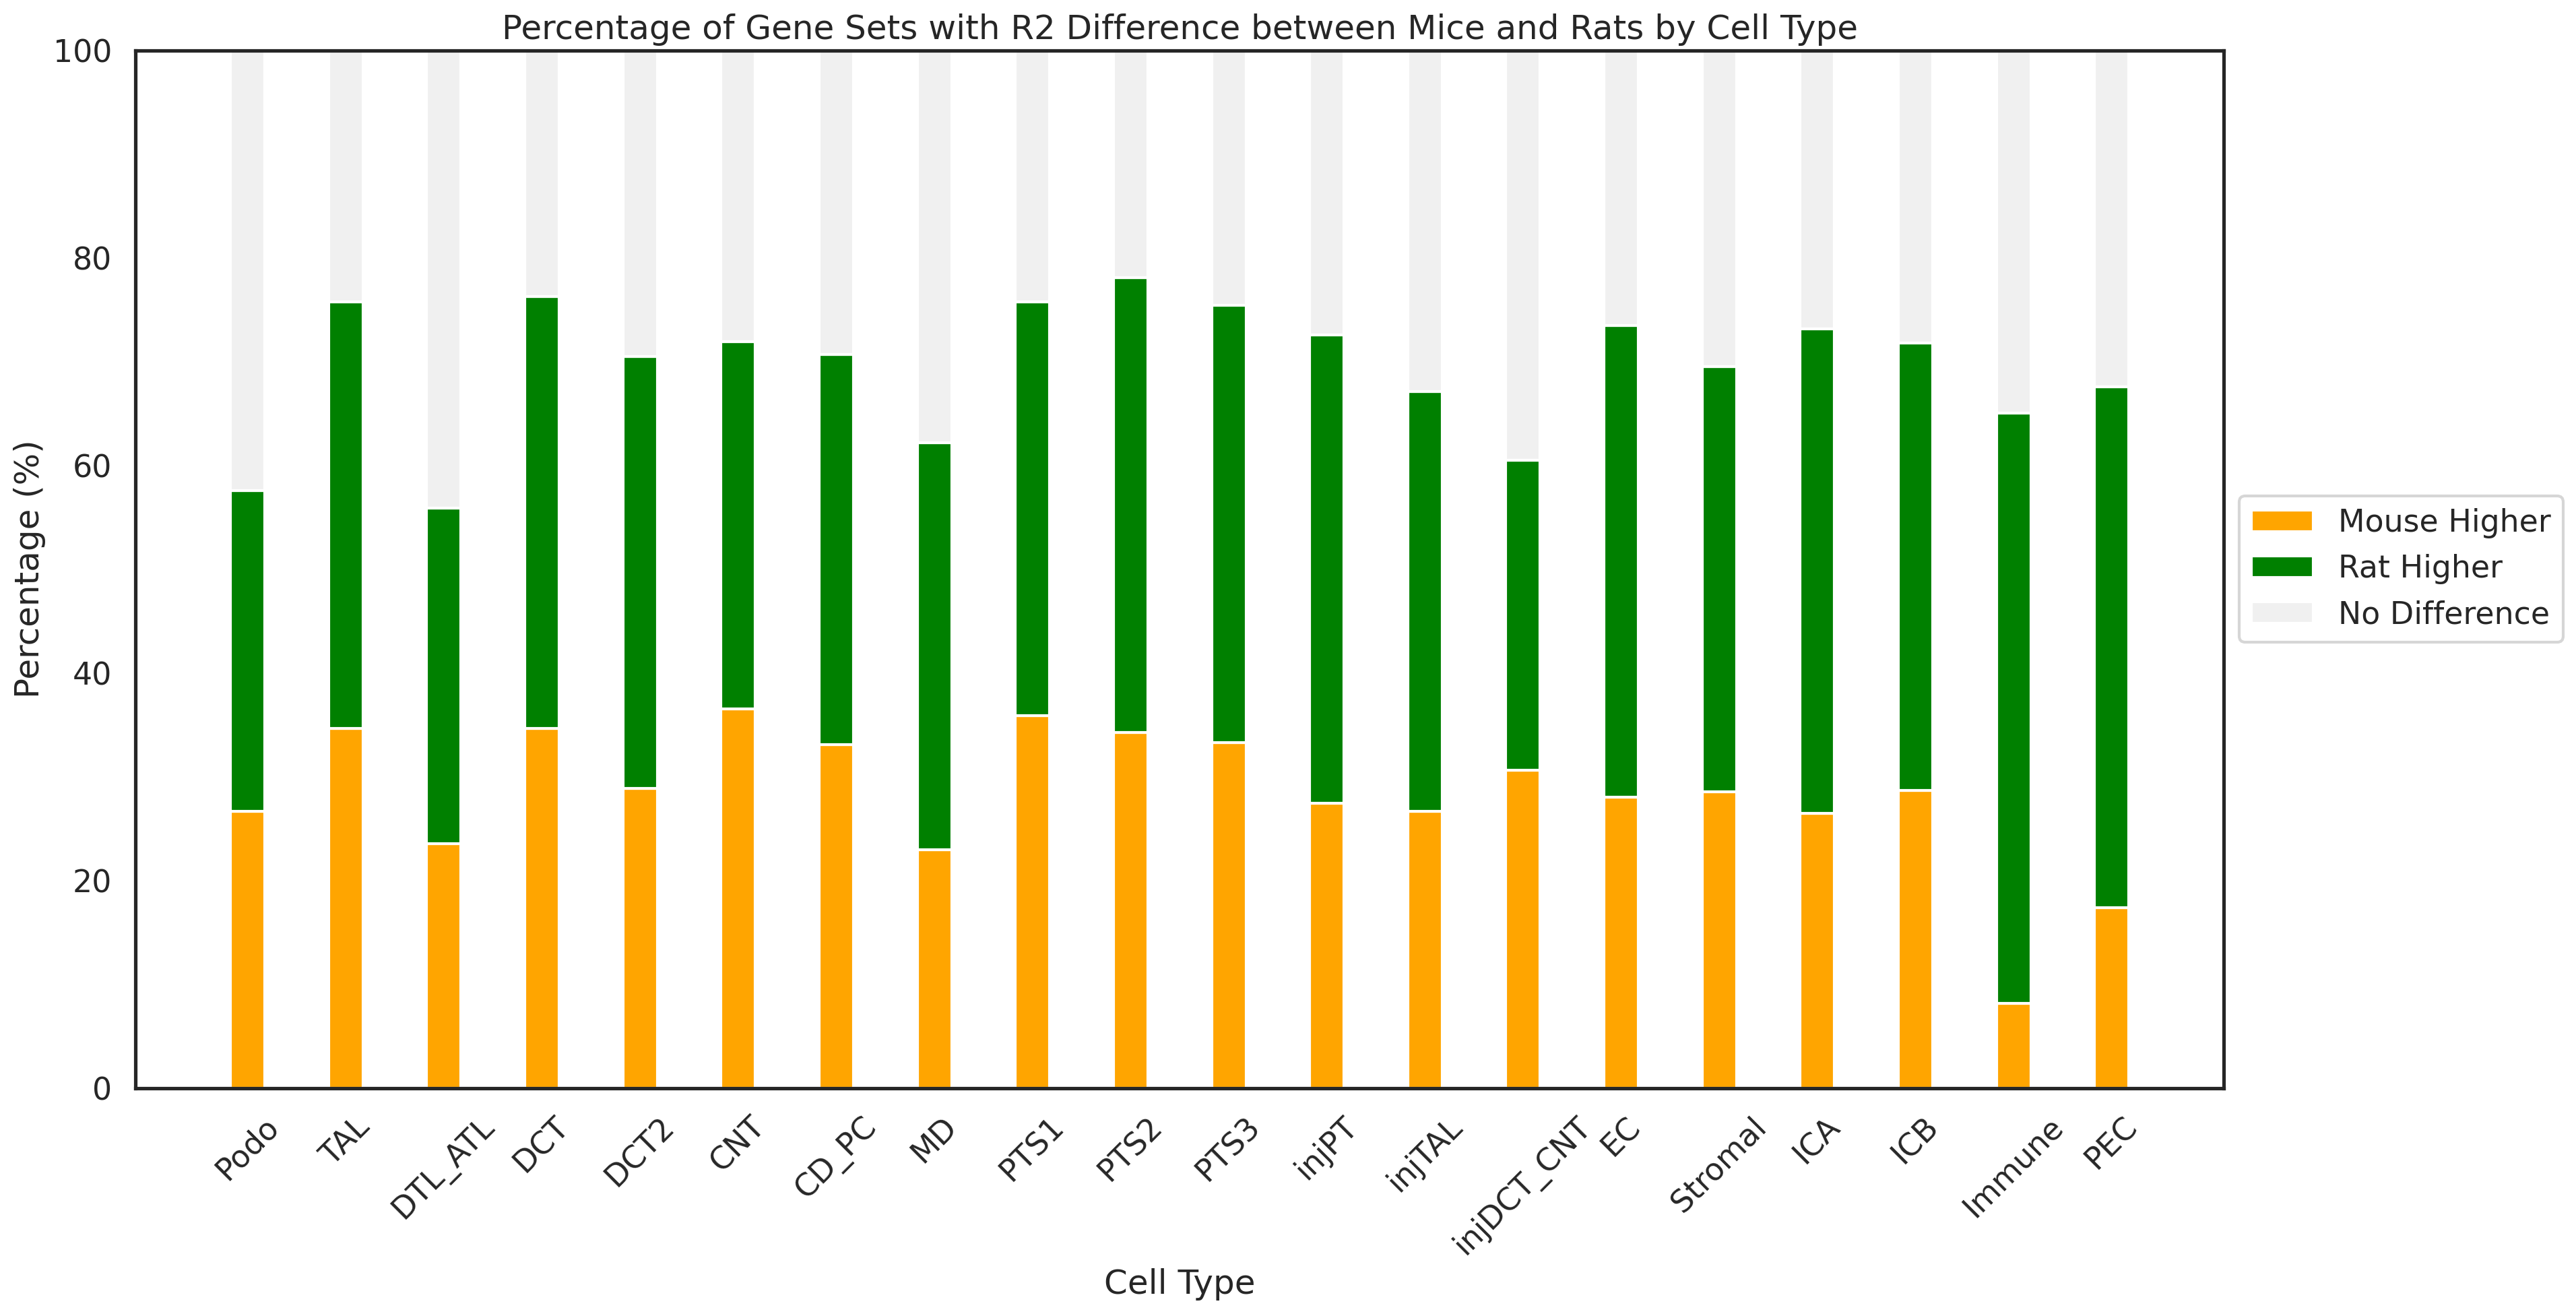

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (4, 4)
# Set the style of the plot for publication
sns.set(style="white", context="talk")  # 'talk' context increases font sizes


# Plotting
bar_width = 0.35
index = np.arange(len(cell_types))

# Adjust the figure size here (width, height)
plt.figure(figsize=(20, 10))  # You can modify the width (15) as needed

plt.bar(index, percent_mouse_highers, bar_width, label='Mouse Higher', color='orange')
plt.bar(index, percent_rat_highers, bar_width, bottom=percent_mouse_highers, label='Rat Higher', color='green')
plt.bar(index, percent_no_differences, bar_width, bottom=np.array(percent_mouse_highers) + np.array(percent_rat_highers), label='No Difference', color='#F0F0F0')

plt.xlabel('Cell Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Gene Sets with R2 Difference between Mice and Rats by Cell Type')

# Rotate x-axis labels slightly
plt.xticks(index, cell_type_names, rotation=45)  # Rotation angle is 15 degrees, adjust as needed

plt.ylim(0, 100)

# Place the legend on the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

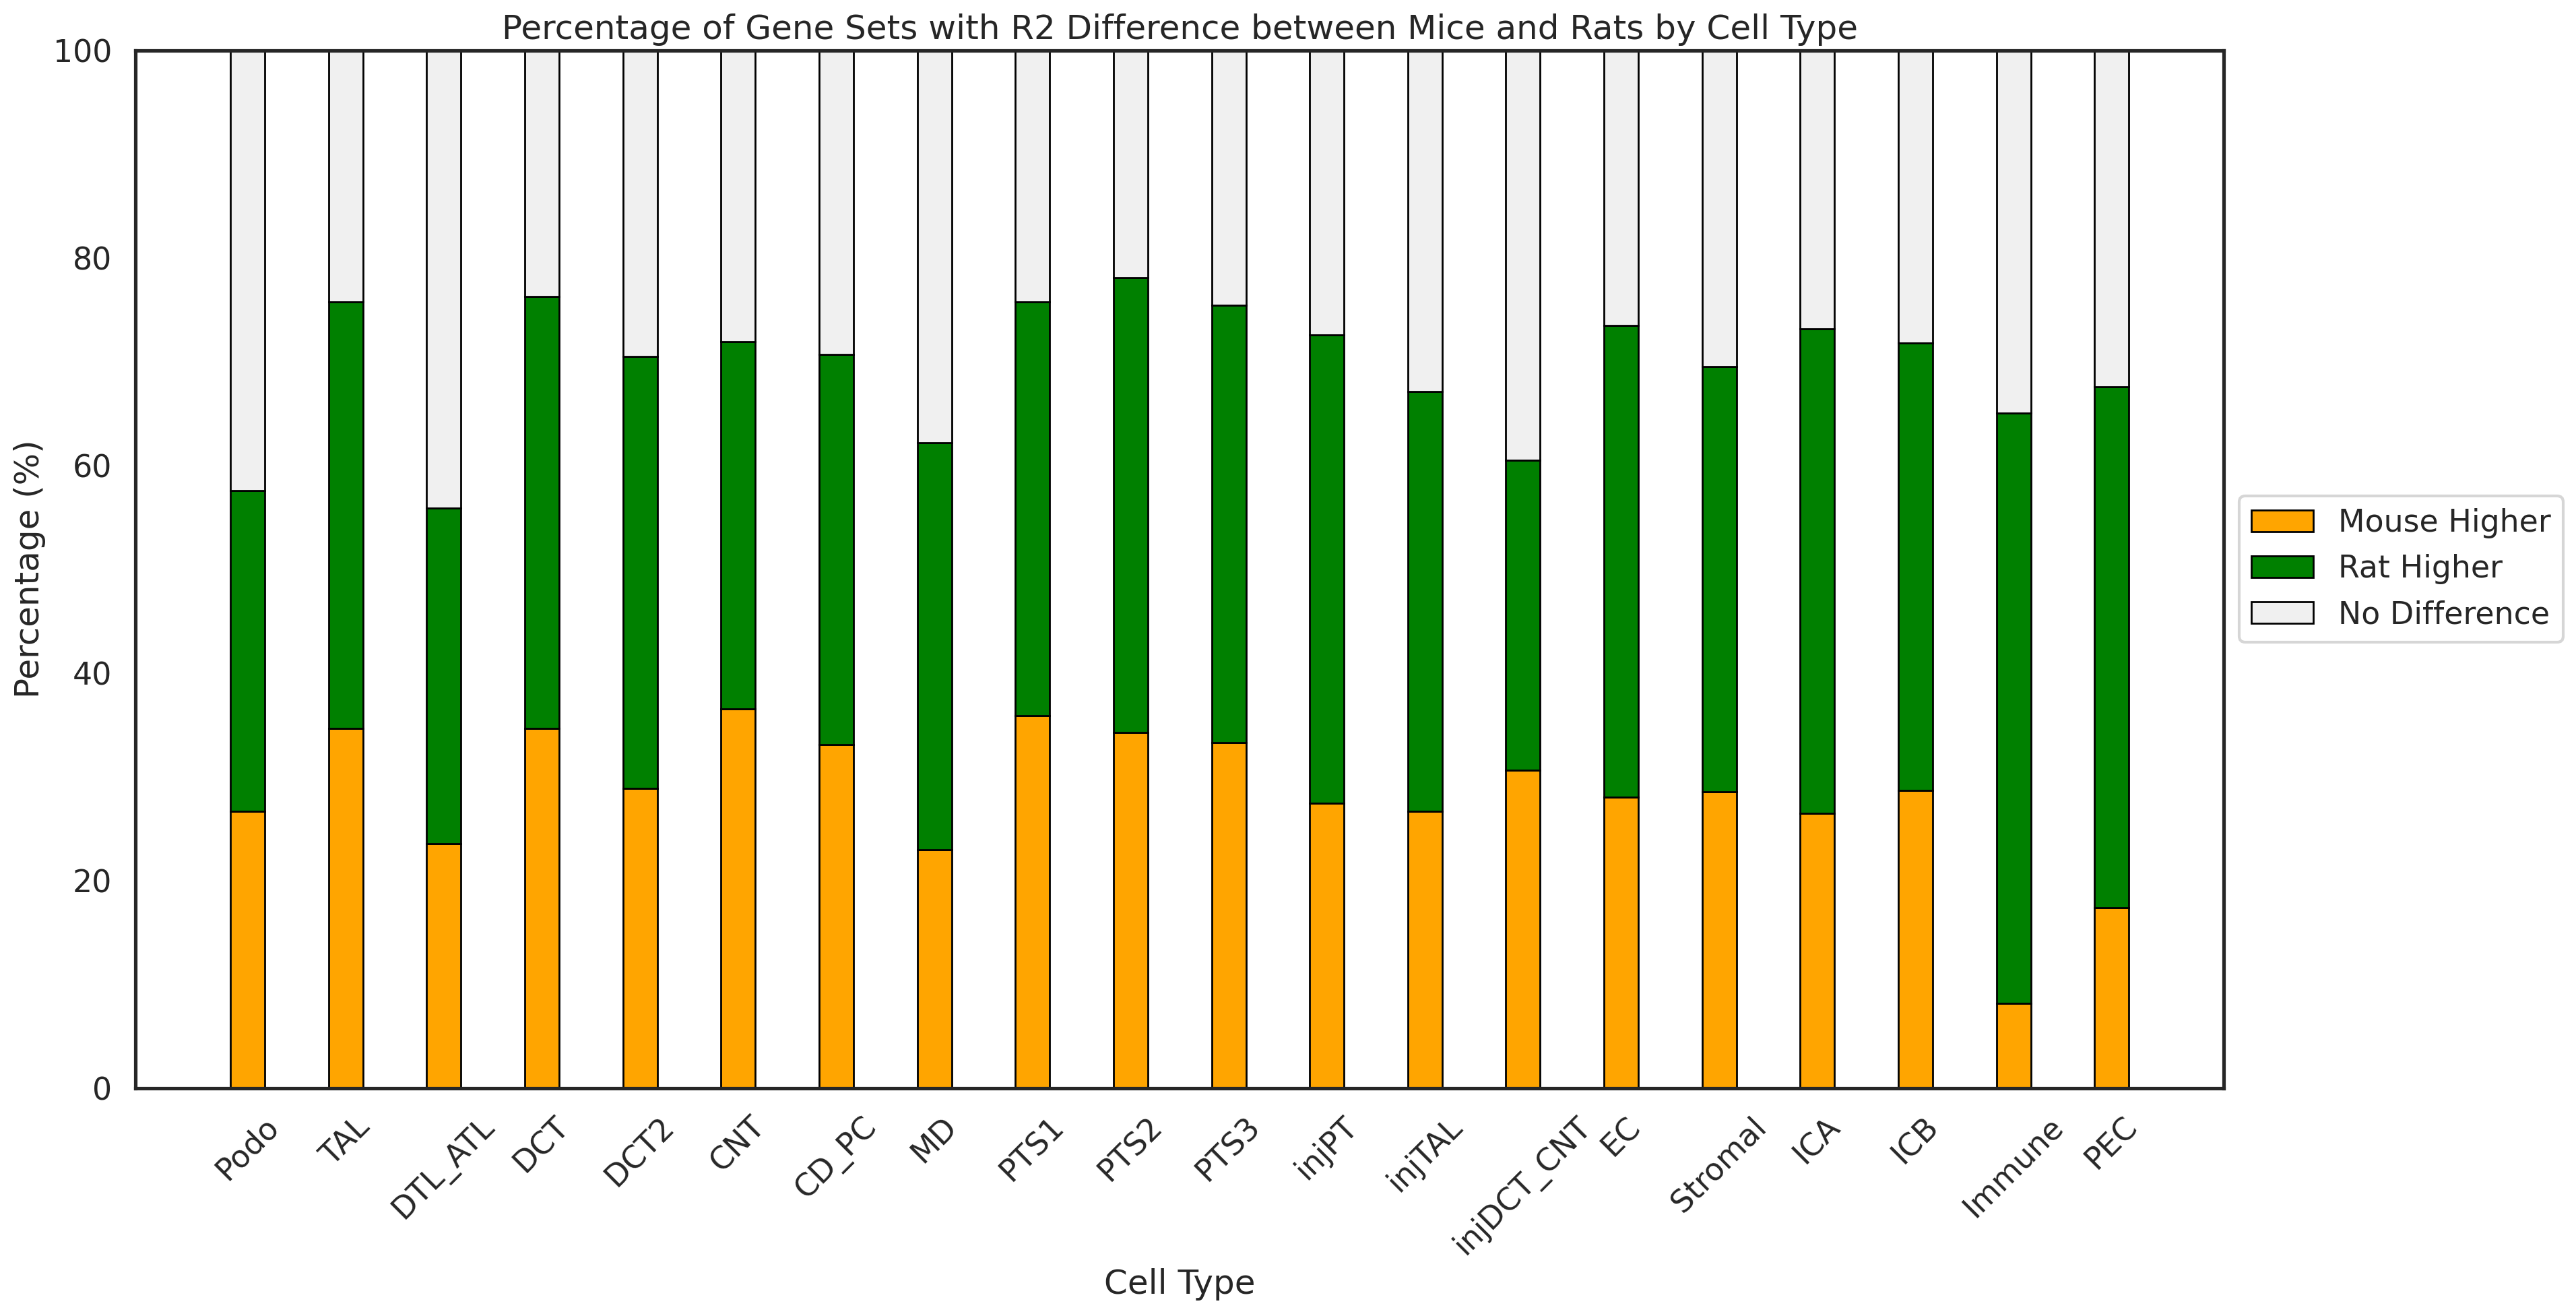

In [122]:
# Assuming percent_mouse_highers, percent_rat_highers, percent_no_differences, cell_type_names are defined

bar_width = 0.35
index = np.arange(len(cell_types))

plt.figure(figsize=(20, 10))

# Add edgecolor and linewidth to each bar
plt.bar(index, percent_mouse_highers, bar_width, label='Mouse Higher', color='orange', edgecolor='black', linewidth=1)
plt.bar(index, percent_rat_highers, bar_width, bottom=percent_mouse_highers, label='Rat Higher', color='green', edgecolor='black', linewidth=1)
plt.bar(index, percent_no_differences, bar_width, bottom=np.array(percent_mouse_highers) + np.array(percent_rat_highers), label='No Difference', color='#F0F0F0', edgecolor='black', linewidth=1)

plt.xlabel('Cell Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Gene Sets with R2 Difference between Mice and Rats by Cell Type')
plt.xticks(index, cell_type_names, rotation=45)
plt.ylim(0, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

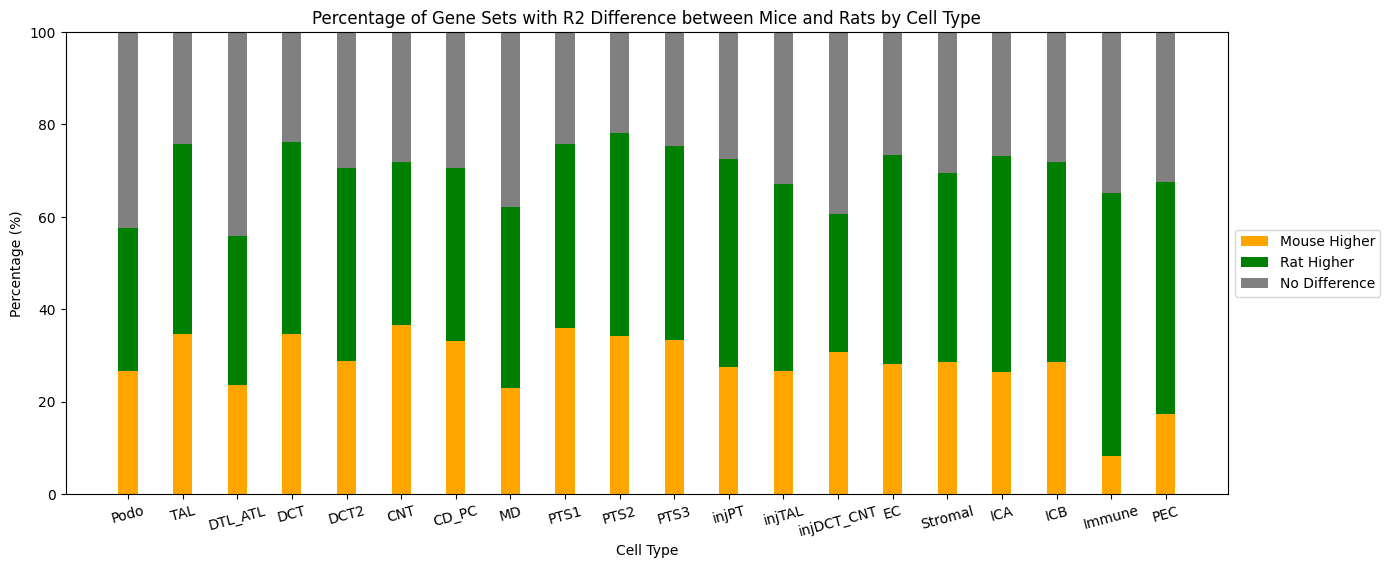

In [39]:
# Plotting
bar_width = 0.35
index = np.arange(len(cell_types))

# Adjust the figure size here (width, height)
plt.figure(figsize=(15, 6))  # You can modify the width (15) as needed

plt.bar(index, percent_mouse_highers, bar_width, label='Mouse Higher', color='orange')
plt.bar(index, percent_rat_highers, bar_width, bottom=percent_mouse_highers, label='Rat Higher', color='green')
plt.bar(index, percent_no_differences, bar_width, bottom=np.array(percent_mouse_highers) + np.array(percent_rat_highers), label='No Difference', color='grey')

plt.xlabel('Cell Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Gene Sets with R2 Difference between Mice and Rats by Cell Type')

# Rotate x-axis labels slightly
plt.xticks(index, cell_type_names, rotation=15)  # Rotation angle is 15 degrees, adjust as needed

plt.ylim(0, 100)

# Place the legend on the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [86]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Assuming 'metadata' and 'r2_base_path' are defined
cell_type = "Podo"  # Replace with the actual cell type

# Read the R2 file for the specified cell type
r2_file_path = f"{r2_base_path}{cell_type}.csv"
r2_data = pd.read_csv(r2_file_path, index_col=0)

# Reshape the R2 data
r2_data_melted = r2_data.reset_index().melt(id_vars='index', var_name='gene_set', value_name='r2_value')

# Merge with metadata to include species information
combined_data = pd.merge(r2_data_melted, metadata, left_on='index', right_on='orig_ident')

# Filter data for mice and rats
data_mice = combined_data[(combined_data['species'] == 'rat') & (combined_data['condition_harmonized2'] == "DKD")]
data_rats = combined_data[(combined_data['species'] == 'rat') & (combined_data['condition_harmonized2'] == "H-CKD")]

# Perform Wilcoxon test for each gene set
results = []
for gene_set in combined_data['gene_set'].unique():
    mouse_values = data_mice[data_mice['gene_set'] == gene_set]['r2_value']
    rat_values = data_rats[data_rats['gene_set'] == gene_set]['r2_value']
    stat, p = mannwhitneyu(mouse_values, rat_values, alternative='two-sided')
    results.append({'gene_set': gene_set, 'p_value': p})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# FDR correction
reject, p_values_corrected, _, _ = multipletests(results_df['p_value'], alpha=0.05, method='fdr_bh')
results_df['reject'] = reject

# Calculate the mean difference for each gene set
mean_differences = []
for gene_set in results_df['gene_set']:
    mean_mouse = data_mice[data_mice['gene_set'] == gene_set]['r2_value'].mean()
    mean_rat = data_rats[data_rats['gene_set'] == gene_set]['r2_value'].mean()
    mean_difference = mean_mouse - mean_rat
    mean_differences.append(mean_difference)

results_df['mean_difference'] = mean_differences

# Sort by p-value and mean difference
results_df_sorted = results_df[results_df['reject']].sort_values(by=['p_value', 'mean_difference'], ascending=[True, False])

# Display the top gene sets where mouse and rat significantly differ
top_gene_sets = results_df_sorted.head(10)  # Display top 10, you can adjust this number
print(top_gene_sets)


Empty DataFrame
Columns: [gene_set, p_value, reject, mean_difference]
Index: []


In [87]:
# Set options to display all columns and expand column width
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

results_df_sorted.head(100)

,gene_set,p_value,reject,mean_difference


In [21]:
import pandas as pd
from scipy.stats import ttest_ind

# Species (or groups) to compare
species1 = 'mouse'
species2 = 'rat'

# Initialize an empty list to store results
t_test_results = []

# Loop through each cell type
for cell_type in cell_types:
    # Subset the data for the current cell type
    data_cell_type = combined_data[combined_data['cell_type'] == cell_type]
    
    # Further subset the data for each of the two species
    group1 = data_cell_type[data_cell_type['species'] == species1]['value']
    group2 = data_cell_type[data_cell_type['species'] == species2]['value']
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')  # 'omit' to ignore NaNs
    
    # Append the results
    t_test_results.append((cell_type, t_stat, p_value))

# Convert results to a DataFrame for easier viewing
t_test_df = pd.DataFrame(t_test_results, columns=['Cell Type', 'T-Statistic', 'P-Value'])

print(t_test_df)

     Cell Type  T-Statistic        P-Value
0         Podo   -10.557986   4.696426e-26
1          TAL    -6.619419   3.609613e-11
2      DTL_ATL    -9.776881   1.423092e-22
3          DCT   -14.489624   1.439564e-47
4         DCT2   -39.039634   0.000000e+00
5          CNT     2.028306   4.252957e-02
6        CD_PC    -7.271015   3.572983e-13
7           MD   -39.281294   0.000000e+00
8         PTS1   -18.754171   1.900054e-78
9         PTS2   -31.396358  3.714917e-216
10        PTS3   -34.087562  2.253762e-254
11       injPT   -49.680766   0.000000e+00
12      injTAL   -33.367555  7.660107e-244
13  injDCT_CNT    15.377203   2.401231e-53
14          EC   -49.174683   0.000000e+00
15     Stromal   -22.059481  8.683512e-108
16         ICA   -47.593738   0.000000e+00
17         ICB   -37.369327  3.172694e-305
18      Immune  -143.870857   0.000000e+00
19         PEC   -95.468795   0.000000e+00


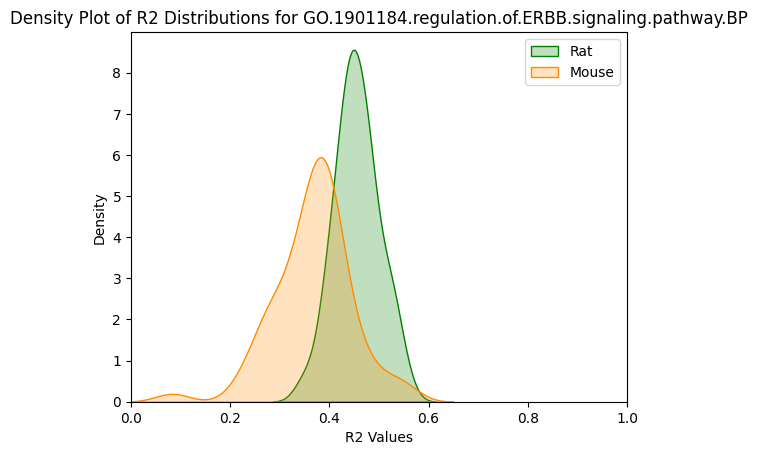

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the paths
metadata_path = "/home/kloetzer/Atlas/scSpectra/multispecies_metadata.csv"  # Replace with the correct metadata file path
r2_base_path = "/home/kloetzer/Atlas/scSpectra/rodents_on_human_disease/R2/R2_"

# Load the metadata
metadata = pd.read_csv(metadata_path)

# Create a new column by concatenating feature1 and feature2
metadata['model'] = metadata['species'].astype(str) + '_' + metadata['condition_harmonized2'].astype(str)


# Set the cell type and gene set of interest
cell_type = "injPT"  # Example cell type
gene_set = "GO.1901184.regulation.of.ERBB.signaling.pathway.BP"  # Replace with the actual gene set name

# Read the R2 file for the specific cell type
r2_file_path = f"{r2_base_path}{cell_type}.csv"
r2_data = pd.read_csv(r2_file_path, index_col=0)

# Subset the R2 data to the gene set of interest
r2_subset = r2_data[[gene_set]]

# Subset the metadata to include only the samples present in the R2 file
metadata_subset = metadata[metadata['orig_ident'].isin(r2_subset.index)]

# Create lists of samples for rat and mouse
rat_samples = metadata_subset[metadata_subset['species'] == 'rat']['orig_ident'].tolist()
mouse_samples = metadata_subset[metadata_subset['species'] == 'mouse']['orig_ident'].tolist()

# Subset the R2 data for rat and mouse
r2_rat = r2_subset.loc[rat_samples]
r2_mouse = r2_subset.loc[mouse_samples]


# Plotting
sns.kdeplot(r2_rat[gene_set], label="Rat", shade=True, clip=(0, 1), color="green")
sns.kdeplot(r2_mouse[gene_set], label="Mouse", shade=True, clip=(0, 1), color="darkorange")
plt.title(f"Density Plot of R2 Distributions for {gene_set}")
plt.xlabel("R2 Values")
plt.ylabel("Density")
plt.legend()
plt.xlim(0, 1)  # Set x-axis limit from 0 to 1
plt.show()

In [31]:
### import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multitest as mt


# Read the R2 file for the specific cell type
r2_file_path = f"{r2_base_path}{cell_type}.csv"
r2_data = pd.read_csv(r2_file_path, index_col=0)

# Subset the metadata to include only the samples present in the R2 file
metadata_subset = metadata[metadata['orig_ident'].isin(r2_data.index)]

# Create lists of samples for rat and mouse
rat_samples = metadata_subset[metadata_subset['species'] == 'rat']['orig_ident'].tolist()
mouse_samples = metadata_subset[metadata_subset['species'] == 'mouse']['orig_ident'].tolist()

# Initialize lists to store results
gene_sets = []
p_values = []

# Loop through each gene set
for gene_set in r2_data.columns:
    # Subset the R2 data for rat and mouse for the current gene set
    r2_rat = r2_data.loc[rat_samples, gene_set]
    r2_mouse = r2_data.loc[mouse_samples, gene_set]

    # Perform Wilcoxon rank-sum test
    stat, p = stats.ranksums(r2_rat, r2_mouse)

    # Store the results
    gene_sets.append(gene_set)
    p_values.append(p)

# Apply multiple testing correction (Benjamini-Hochberg)
corrected_p_values = mt.multipletests(p_values, method='fdr_bh')[1]

# Combine results into a DataFrame
results = pd.DataFrame({
    'Gene Set': gene_sets,
    'P-Value': p_values,
    'Corrected P-Value': corrected_p_values
})

# Sort by corrected p-value
results_sorted = results.sort_values(by='P-Value')

# Display the most significantly different gene sets
print(results_sorted.head())  # Adjust the number in head() to display more or fewer results


                                               Gene Set   P-Value  \
1474             GO.0016082.synaptic.vesicle.priming.BP  0.000379   
1730  GO.0021513.spinal.cord.dorsal.ventral.patterni...  0.000379   
1729               GO.0021511.spinal.cord.patterning.BP  0.000379   
718   GO.0006336.DNA.replication.independent.nucleos...  0.000379   
4907  GO.1900026.positive.regulation.of.substrate.ad...  0.000379   

      Corrected P-Value  
1474           0.002069  
1730           0.002069  
1729           0.002069  
718            0.002069  
4907           0.002069  


In [32]:
print(results_sorted.head(50))  # Adjust the number in head() to display more or fewer results


                                               Gene Set   P-Value  \
1474             GO.0016082.synaptic.vesicle.priming.BP  0.000379   
1730  GO.0021513.spinal.cord.dorsal.ventral.patterni...  0.000379   
1729               GO.0021511.spinal.cord.patterning.BP  0.000379   
718   GO.0006336.DNA.replication.independent.nucleos...  0.000379   
4907  GO.1900026.positive.regulation.of.substrate.ad...  0.000379   
722   GO.0006349.regulation.of.gene.expression.by.ge...  0.000379   
4905  GO.1900024.regulation.of.substrate.adhesion.de...  0.000379   
1717                      GO.0019894.kinesin.binding.MF  0.000379   
725   GO.0006354.DNA.templated.transcription..elonga...  0.000379   
4008  GO.0060442.branching.involved.in.prostate.glan...  0.000379   
727   GO.0006359.regulation.of.transcription.by.RNA....  0.000379   
4010  GO.0060444.branching.involved.in.mammary.gland...  0.000379   
730   GO.0006368.transcription.elongation.from.RNA.p...  0.000379   
1695    GO.0019432.triglyceride.bi